# **IMPORT LIBRARIES AND LOAD DATA**


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,15]


from google.colab import files
uploaded = files.upload()


Saving bike_sales_data_world_2013_2023.csv to bike_sales_data_world_2013_2023.csv


In [4]:
import pandas as pd
df = pd.read_csv("bike_sales_data_world_2013_2023.csv")
df.head()


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Rating,Shipping_Weight,Delivery_Time,Discount,Eco_Friendly,Shipping_Cost,Shipping_Company,Shipping_Type,Insurance,Return_Policy
0,2017-11-26,26,November,2017,19,Youth (<25),M,Canada,British Columbia,Accessories,...,4,13.25,2,25,True,40.58,GLS,Standard,Basic,30 Days
1,2014-11-26,26,November,2014,19,Youth (<25),M,Canada,British Columbia,Accessories,...,5,4.56,4,1,True,95.32,Posti,Same Day,NaN,30 Days
2,2019-03-23,23,March,2019,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,3,8.97,1,0,True,74.54,GLS,Express,Premium,7 Days
3,2015-03-23,23,March,2015,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,5,2.56,1,10,False,61.87,DHL,Same Day,NaN,7 Days
4,2018-05-15,15,May,2018,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,5,11.21,1,6,False,19.82,GLS,Same Day,Basic,30 Days


# **DATA UNDERSTANDING**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226072 entries, 0 to 226071
Data columns (total 33 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              226072 non-null  object 
 1   Day               226072 non-null  int64  
 2   Month             226072 non-null  object 
 3   Year              226072 non-null  int64  
 4   Customer_Age      226072 non-null  int64  
 5   Age_Group         226072 non-null  object 
 6   Customer_Gender   226072 non-null  object 
 7   Country           226072 non-null  object 
 8   State             226072 non-null  object 
 9   Product_Category  226072 non-null  object 
 10  Sub_Category      226072 non-null  object 
 11  Product           226072 non-null  object 
 12  Order_Quantity    226072 non-null  int64  
 13  Unit_Cost         226072 non-null  int64  
 14  Unit_Price        226072 non-null  int64  
 15  Profit            226072 non-null  int64  
 16  Cost              22

In [6]:
df.shape

(226072, 33)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Day,226072.0,15.665753,8.781547,1.0,8.00,16.00,23.00,31.0
Year,226072.0,2017.992887,3.163415,2013.0,2015.00,2018.00,2021.00,2023.0
Customer_Age,226072.0,35.919212,11.021911,17.0,28.00,35.00,43.00,87.0
Order_Quantity,226072.0,11.901660,9.561836,1.0,2.00,10.00,20.00,32.0
Unit_Cost,226072.0,267.296366,549.834267,1.0,2.00,9.00,42.00,2171.0
Unit_Price,226072.0,452.938427,922.069180,2.0,5.00,24.00,70.00,3578.0
Profit,226072.0,285.051665,453.886439,-30.0,29.00,101.00,358.00,15096.0
Cost,226072.0,469.318695,884.864161,1.0,28.00,108.00,432.00,42978.0
Revenue,226072.0,754.370360,1309.091778,2.0,63.00,223.00,800.00,58074.0
Rating,226072.0,3.005724,1.416783,1.0,2.00,3.00,4.00,5.0


### **INFERENCE**

#### **Highly Right-Skewed Columns**
- **Unit_Cost**
- **Unit_Price**
- **Profit**
- **Cost**
- **Revenue**

➡ These are **financial variables** where a few very high values create a **long right tail**, which is **common in sales datasets**.

---

#### **Slightly Right-Skewed Columns**
- **Order_Quantity**
- **Customer_Age**

➡ Indicates a small number of large orders or older customers pulling the mean to the right.

---

#### **Slightly Left-Skewed Columns**
- **Discount**
- **Day**

➡ Mean is slightly lower than the median — most values cluster toward the higher end.

---

#### **Symmetric (Approximately Normal) Columns**
- **Year**
- **Shipping_Weight**
- **Delivery_Time**
- **Shipping_Cost**
- **Rating**

➡ Mean ≈ Median → these variables are **fairly balanced and normally distributed**.


In [8]:
df.isnull().sum()

,0
Date,0
Day,0
Month,0
Year,0
Customer_Age,0
Age_Group,0
Customer_Gender,0
Country,0
State,0
Product_Category,0


In [9]:
df.duplicated().sum()

np.int64(113011)

In [10]:
df.nunique()

,0
Date,4015
Day,31
Month,12
Year,11
Customer_Age,70
Age_Group,4
Customer_Gender,2
Country,31
State,53
Product_Category,3


# **DATA CLEANING**

In [11]:
df.drop_duplicates(inplace=True) # removing duplicates

In [12]:
for i in df.columns:
    print(i)
    print(df[i].dtype)
    print("------------------")
    print(df[i].unique())
    print(df[i].nunique())
    print("-------------------------------------------------------------------")

Date
object
------------------
['2017-11-26' '2014-11-26' '2019-03-23' ... '2023-08-11' '2022-08-22'
 '2023-07-11']
4015
-------------------------------------------------------------------
Day
int64
------------------
[26 23 15 22 30  2 17 27 25 13 19 11 31 28  7 24  3  4 10 12  6 20 29 16
 14 18  9  8  5  1 21]
31
-------------------------------------------------------------------
Month
object
------------------
['November' 'March' 'May' 'February' 'July' 'August' 'September' 'January'
 'December' 'June' 'October' 'April']
12
-------------------------------------------------------------------
Year
int64
------------------
[2017 2014 2019 2015 2018 2023 2021 2020 2013 2022 2016]
11
-------------------------------------------------------------------
Customer_Age
int64
------------------
[19 49 47 35 32 34 29 51 48 43 61 57 38 52 24 23 26 54 46 41 33 42 45 53
 21 22 67 31 37 87 25 40 44 55 50 59 17 27 28 36 56 58 30 18 62 39 64 63
 20 60 84 68 65 73 69 66 75 76 78 71 72 82 86 77 74 85 81

In [13]:
df["Insurance"] = df["Insurance"].fillna("Unknown")

In [14]:
df["Insurance"].value_counts()

,count
Insurance,
Premium,37794
Unknown,37650
Basic,37617


In [15]:
df['Eco_Friendly'] = df['Eco_Friendly'].astype(int)

In [16]:
df.drop('Date',axis=1, inplace=True)

In [17]:
df['Rating_Class'] = ['High' if x in (4,5) else 'Low' for x in df['Rating']] # TARGET VARIABLE

In [18]:
df.drop("Rating",axis=1,inplace=True)

# **UNIVARIATE ANALYSIS - NUMERICAL COLUMNS**

# **BOXPLOT**

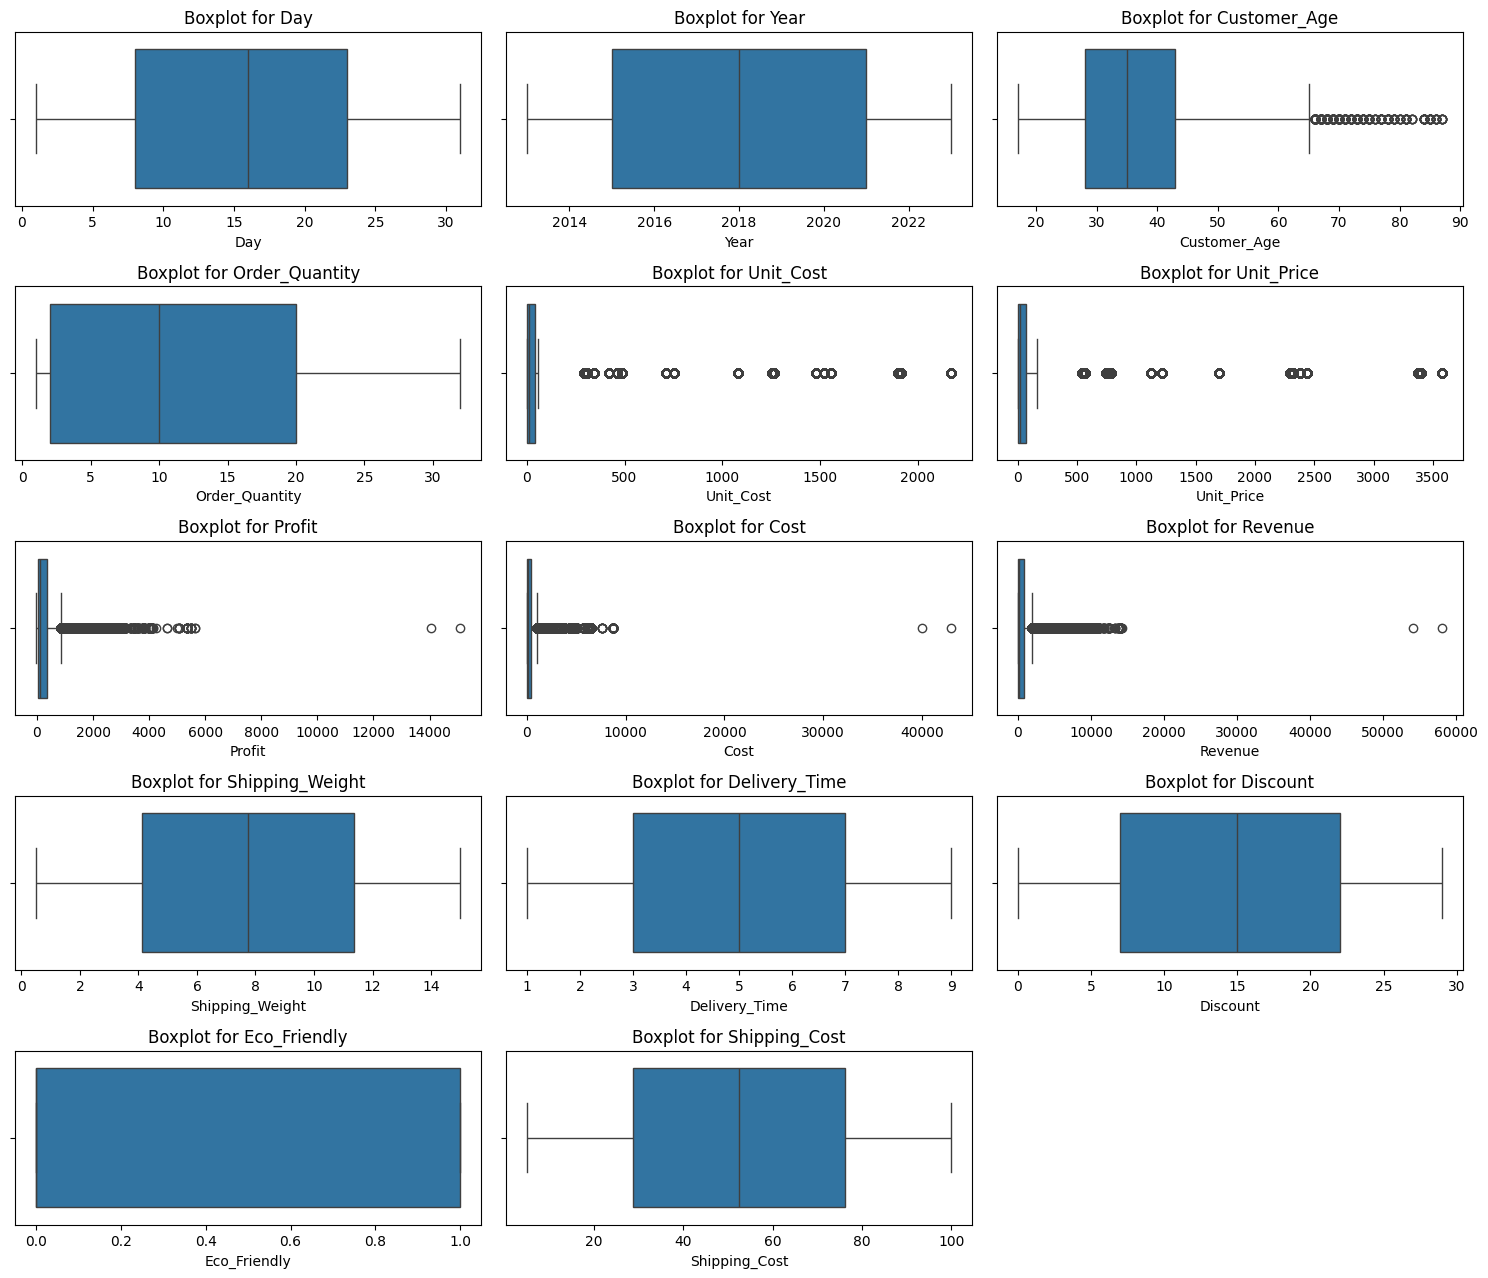

In [19]:
num = df.select_dtypes(include=np.number).columns.tolist()
t=1
for i in num:
    plt.subplot(6,3,t)
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot for {i}')
    t += 1
plt.tight_layout()
plt.show()

### **INFERENCE:**
The boxplots reveal that most variables are well-distributed, with outliers mainly in financial fields (Unit_Cost, Unit_Price, Profit, Cost, Revenue). These reflect genuine high-value or bulk transactions, not errors, indicating right-skewed distributions from premium products. Customer_Age and Order_Quantity show minor valid outliers, while Day and Year remain uniform. Overall, the outliers represent real business diversity in sales and customer behavior.


# **HISTPLOT**

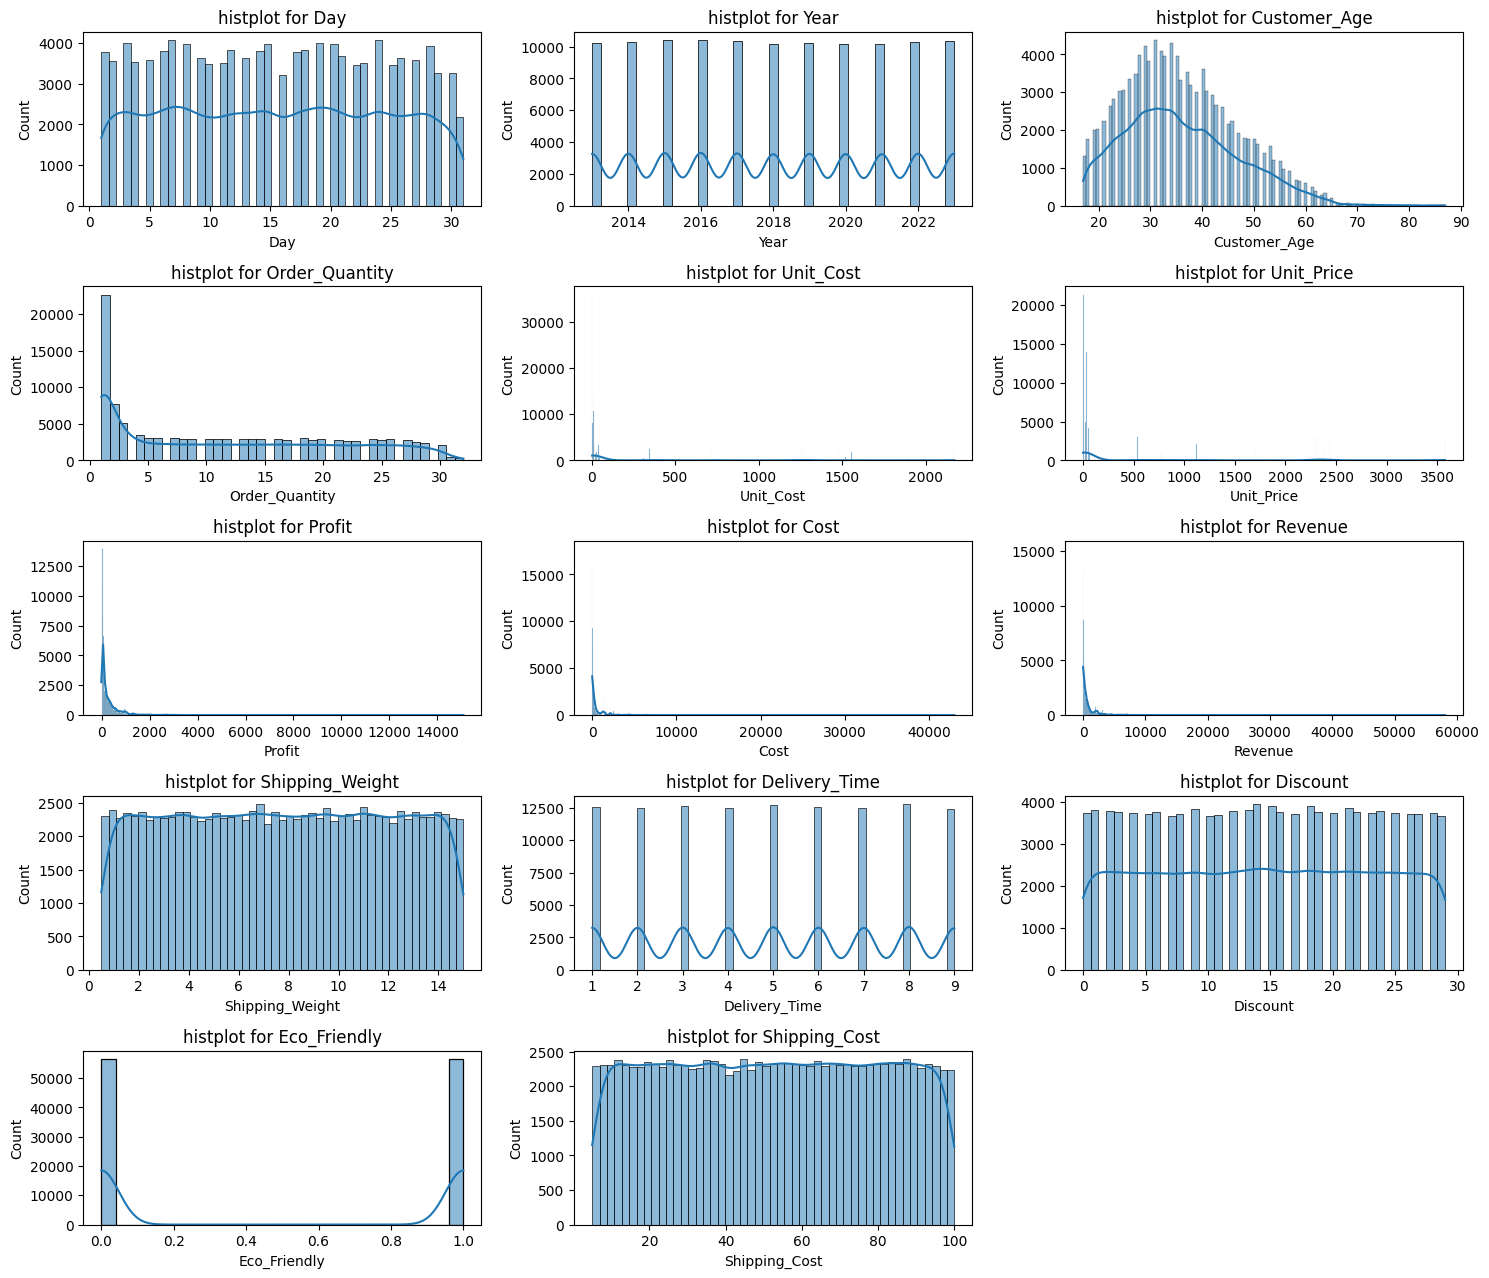

In [20]:
t=1
for i in num:
    plt.subplot(6,3,t)
    sns.histplot(df[i],kde=True)
    plt.title(f'histplot for {i}')
    t += 1
plt.tight_layout()
plt.show()

### **INFERENCE:**
Most numeric variables are right-skewed, with many low values and few extreme highs, especially in Unit_Cost, Unit_Price, Profit, Cost, and Revenue — indicating high-value transactions. Customer_Age is roughly normal around 35 years, while Rating, Day, Year, and Delivery_Time show uniform distributions. Overall, the data reflects diverse transactions, steady timelines, and balanced customer demographics.

# **UNIVARIATE ANALYSIS - CATEGORICAL COLUMNS**

# **COUNTPLOT**

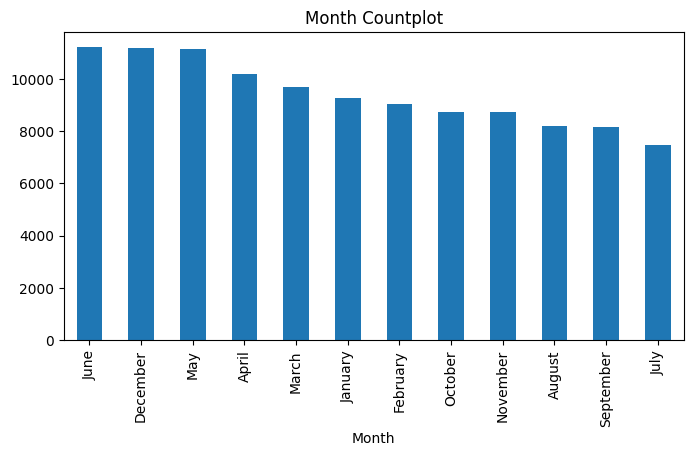

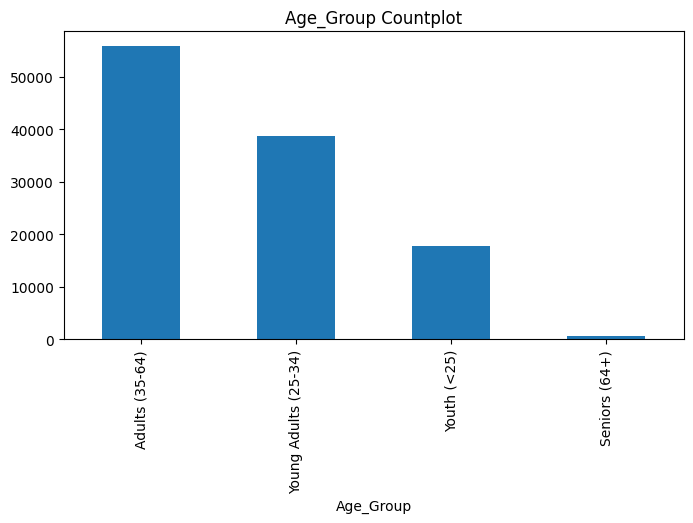

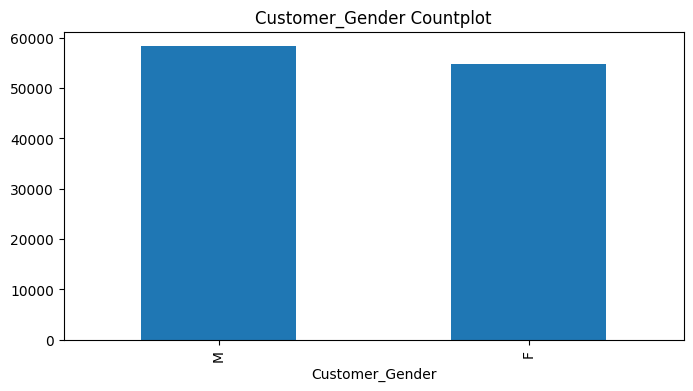

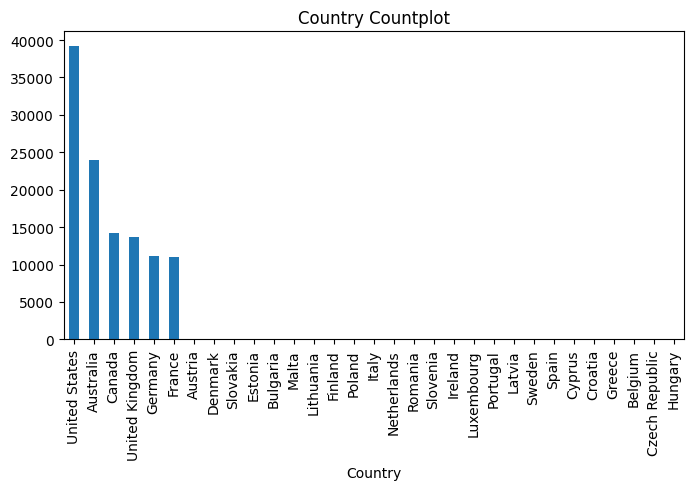

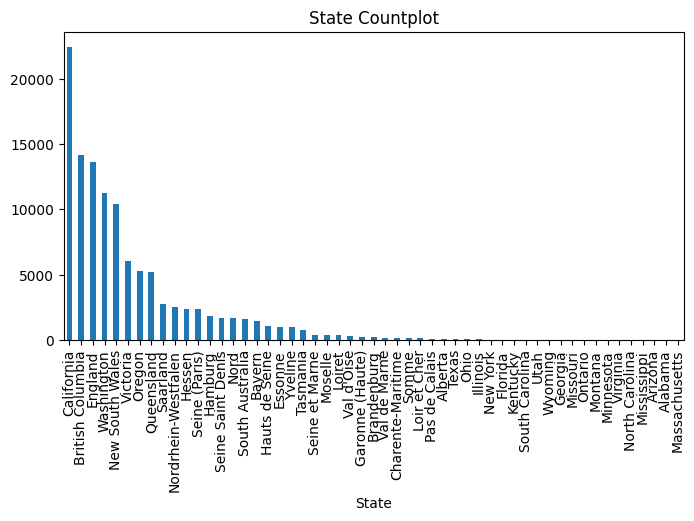

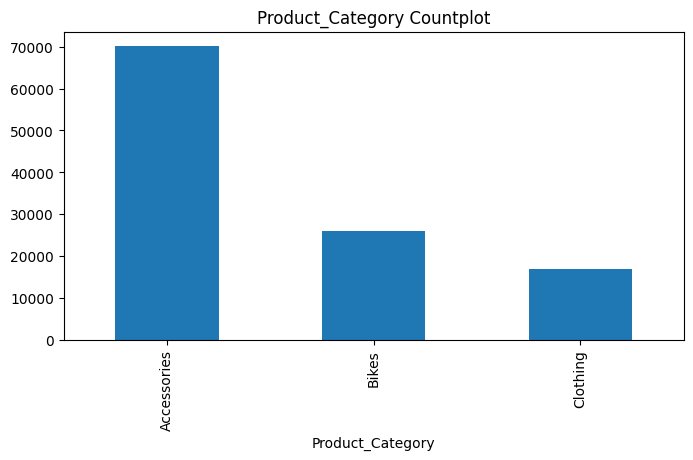

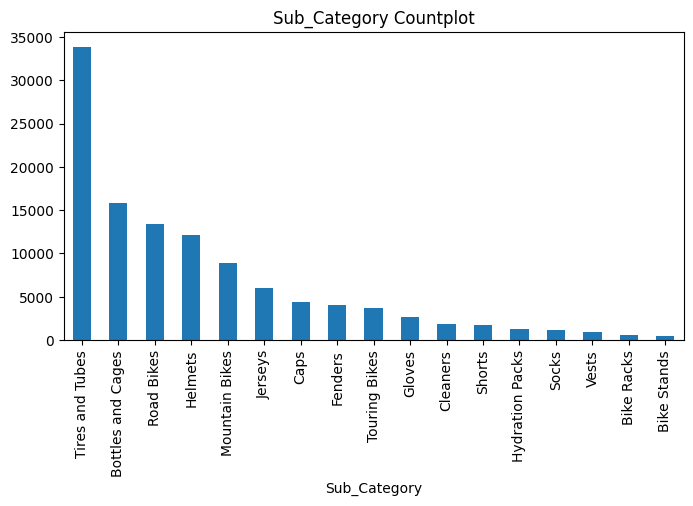

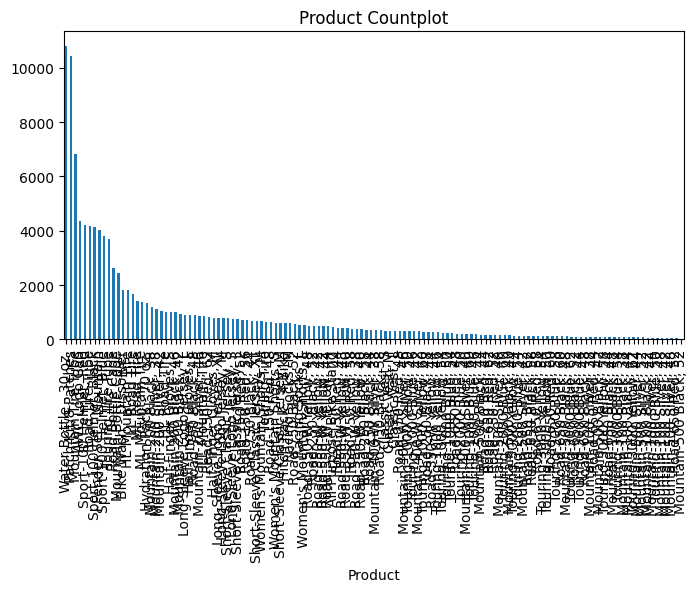

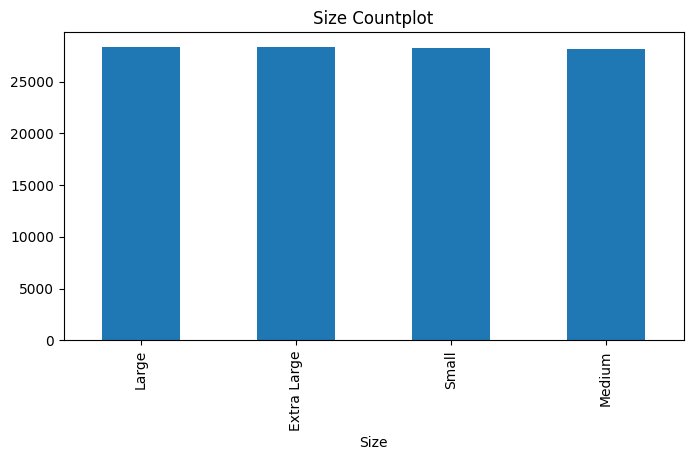

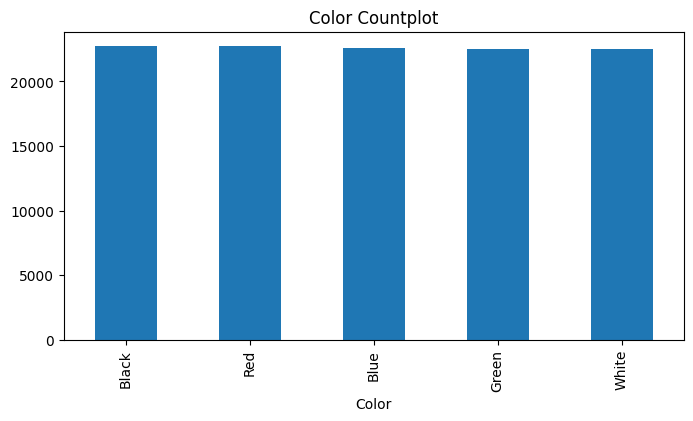

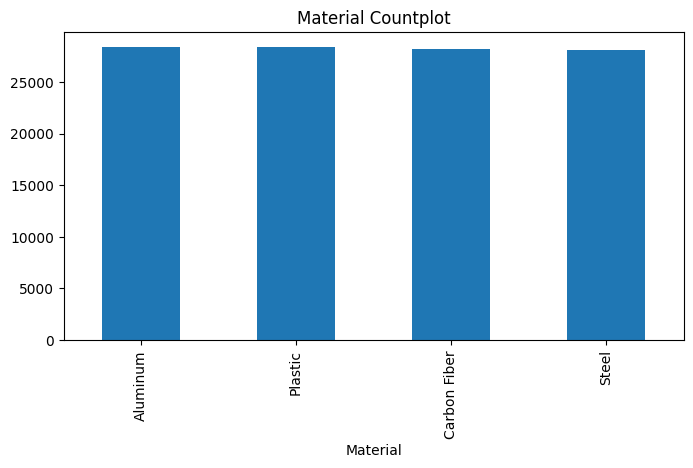

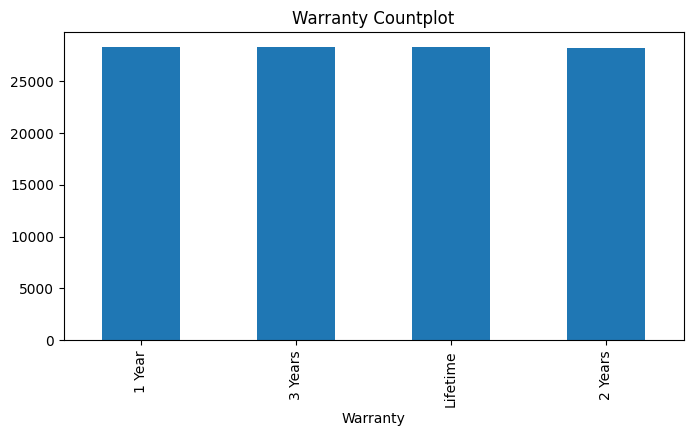

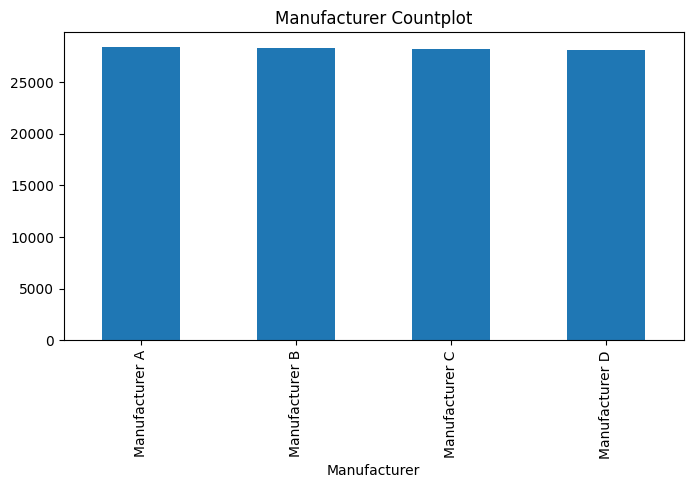

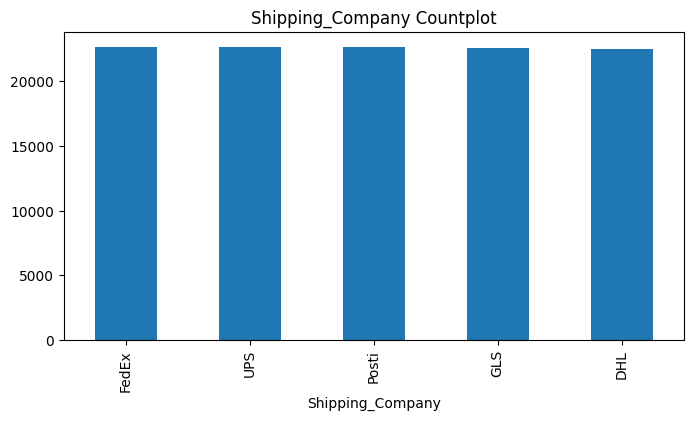

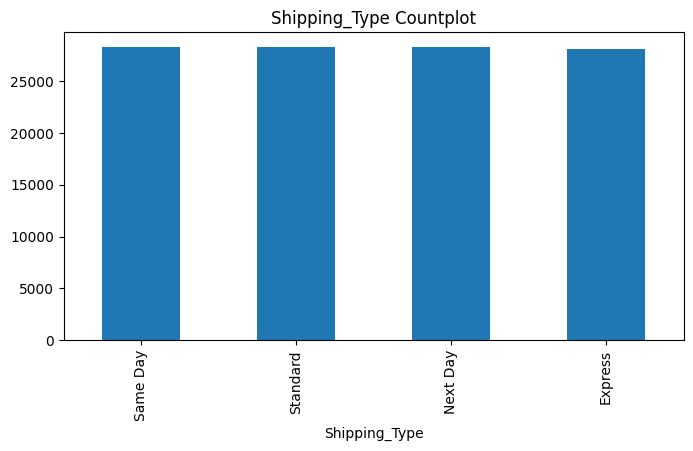

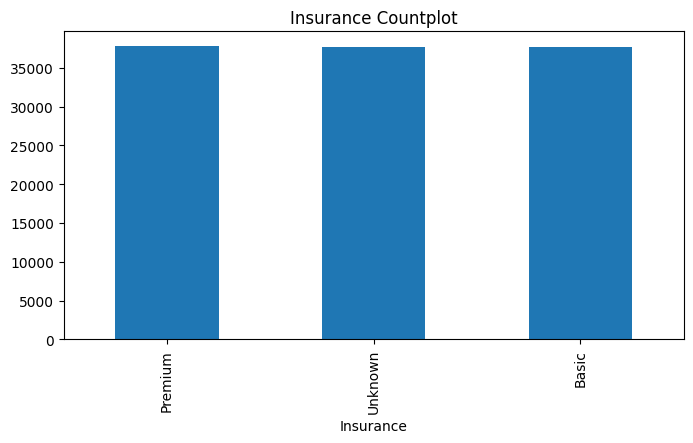

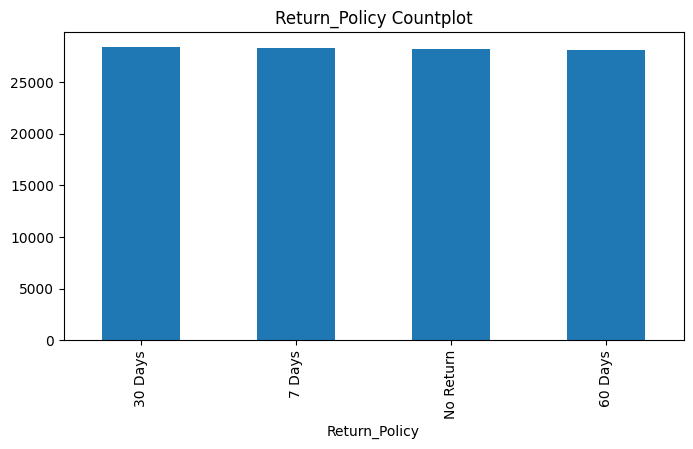

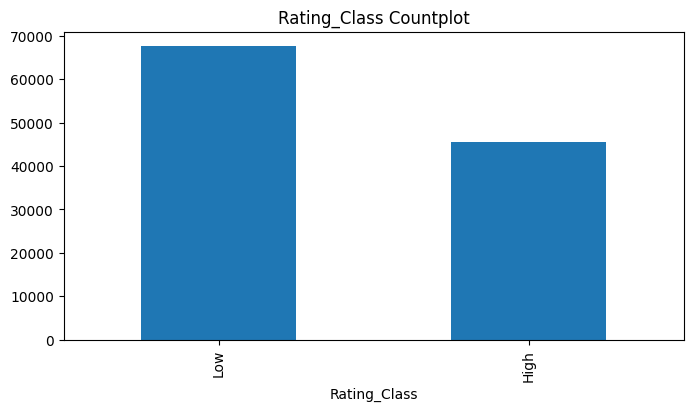

In [21]:
cat = df.select_dtypes(include=object).columns.tolist()
for col in cat:
    plt.figure(figsize=(8,4))
    df[col].value_counts().plot(kind="bar")
    plt.title(f"{col} Countplot")
    plt.show()

# **BIVARIATE ANALYSIS**

# **NUMERIC COLUMNS VS TARGET VARIABLE**

In [22]:
num1 = df.select_dtypes(include=np.number).columns.tolist()

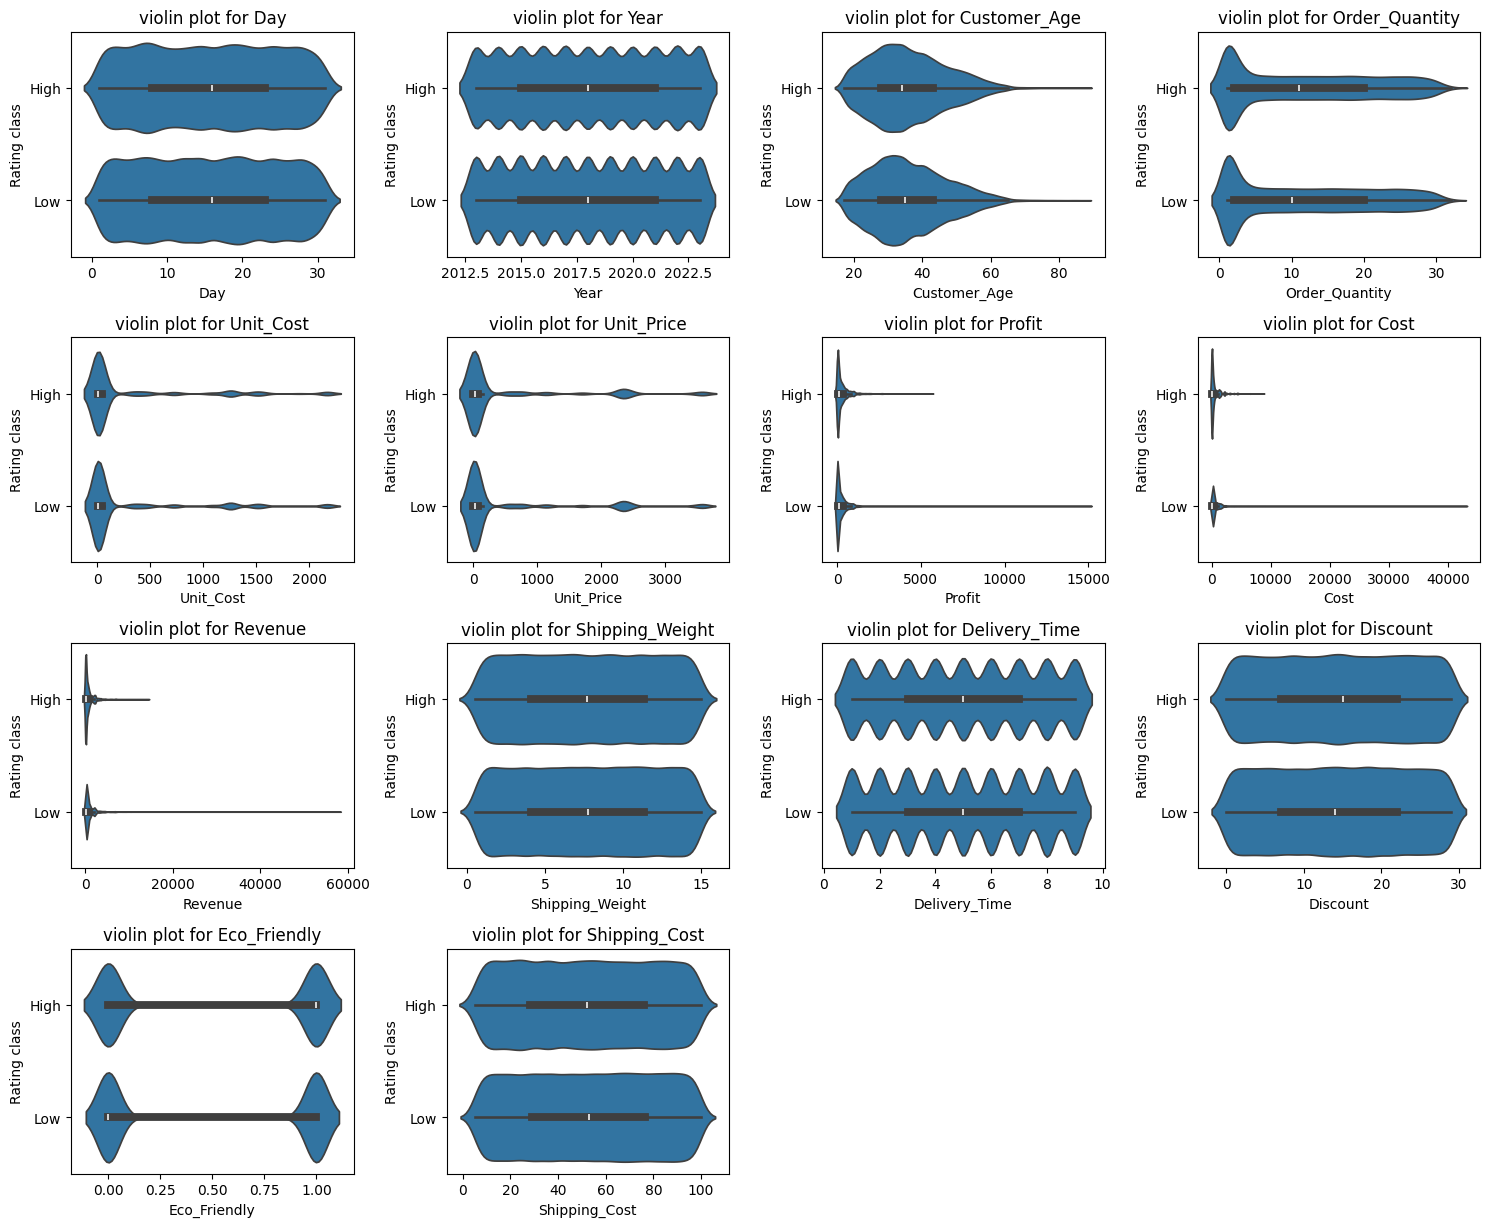

In [23]:
t=1
for i in num1:
    plt.subplot(5,4,t)
    sns.violinplot(x=df[i],y = df['Rating_Class'])
    plt.title(f'violin plot for {i}')
    plt.xlabel(i)
    plt.ylabel('Rating class')
    t += 1
plt.tight_layout()
plt.show()

### **INFERENCE:**
The violin plots show that most numeric variables (cost, revenue, order quantity, shipping factors) have similar distributions across rating classes, indicating limited impact on customer ratings. Slight differences in **Customer_Age** and **Delivery_Time** suggest younger customers and faster deliveries give higher ratings. Overall, numeric features alone offer weak class separation, highlighting the need for **feature engineering** and **categorical interactions** to improve model performance.


# **CATEGORICAL COLUMNS VS TARGET VARIABLE**

In [24]:
for i in cat:
    print(f'Relation between {i} and Rating class (Target)')
    print(pd.crosstab(df[i],df['Rating_Class']))
    print('*******************')

Relation between Month and Rating class (Target)
Rating_Class  High   Low
Month                   
April         4098  6085
August        3434  4766
December      4423  6780
February      3645  5377
January       3632  5654
July          2980  4484
June          4537  6701
March         3877  5801
May           4516  6615
November      3473  5264
October       3508  5244
September     3397  4770
*******************
Relation between Age_Group and Rating class (Target)
Rating_Class           High    Low
Age_Group                         
Adults (35-64)        22447  33389
Seniors (64+)           304    426
Young Adults (25-34)  15520  23146
Youth (<25)            7249  10580
*******************
Relation between Customer_Gender and Rating class (Target)
Rating_Class      High    Low
Customer_Gender              
F                22095  32640
M                23425  34901
*******************
Relation between Country and Rating class (Target)
Rating_Class     High    Low
Country            

### **INFERENCE**

* High vs. Low Rating imbalance is consistent across nearly all categorical variables.

* No single demographic, product, or logistics variable stands out as a strong differentiator.

* This suggests systemic dissatisfaction, likely driven by operational aspects such as delivery time, communication, or post-sale service rather than product or demographic factors.

* For predictive modeling, combining numerical features (e.g., Delivery_Time, Shipping_Cost) with engineered interaction terms (e.g., Discount × Month or Category × Region) could improve class differentiation and model performance.


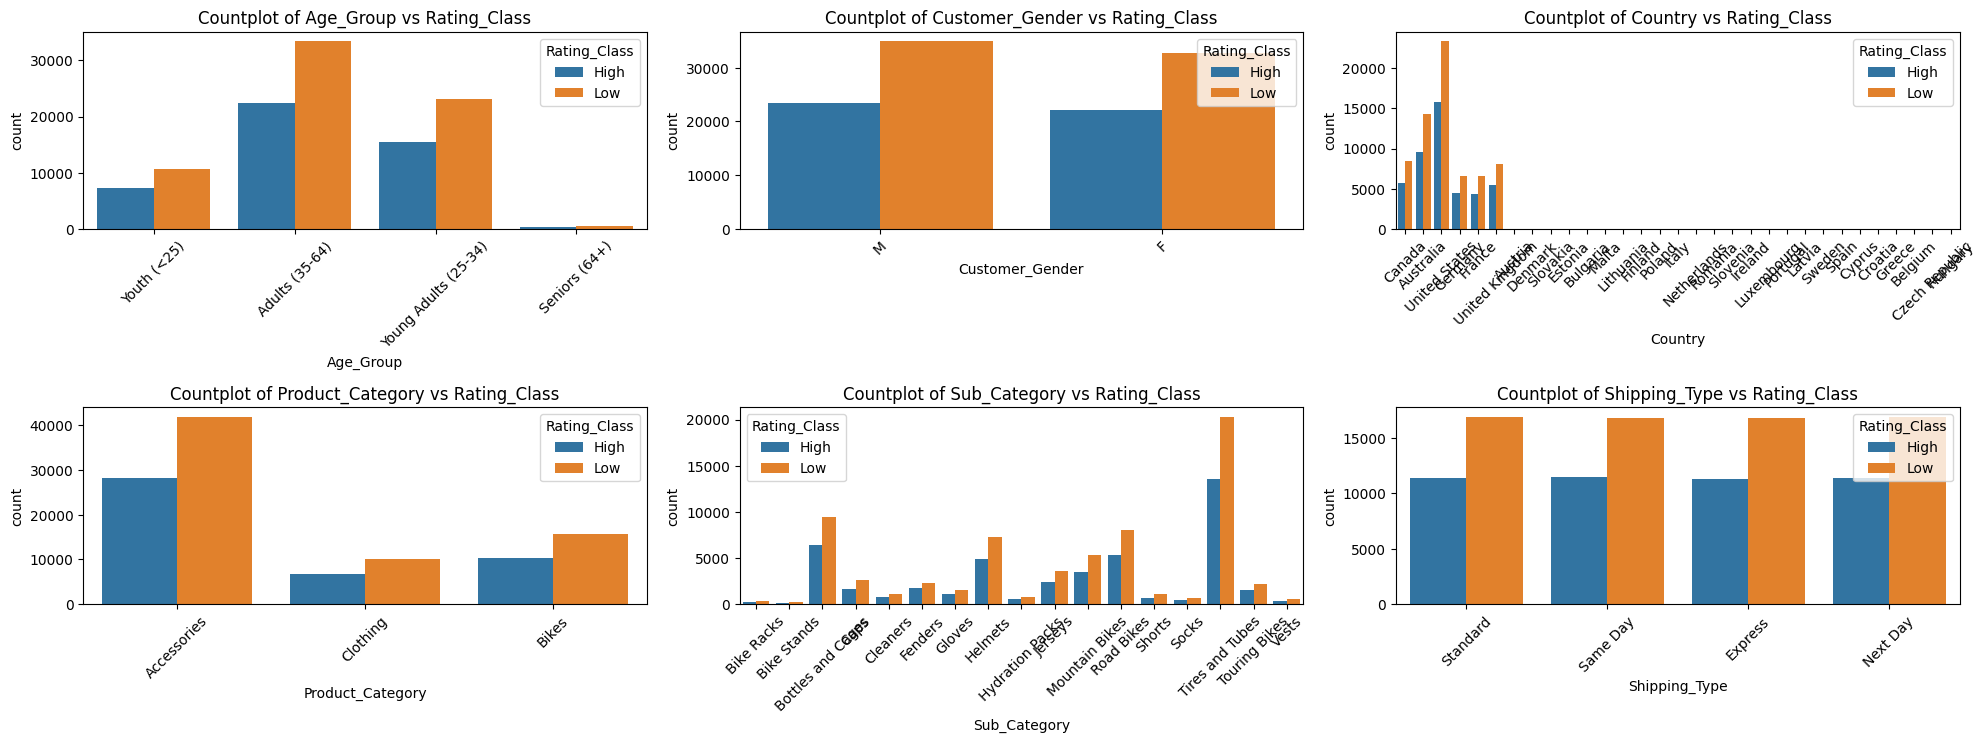

In [25]:
t=1
plt.figure(figsize=(20, 10))
for i in ['Age_Group','Customer_Gender','Country','Product_Category','Sub_Category','Shipping_Type']:
    plt.subplot(3,3, t)
    sns.countplot(x=df[i], hue=df['Rating_Class'])
    plt.title(f'Countplot of {i} vs Rating_Class')
    plt.xticks(rotation=45)
    t += 1

plt.tight_layout()
plt.show()

### **INFERENCE**

* Most high ratings come from **Adults (35–64)** and **Young Adults (25–34)**, indicating stronger satisfaction in these age groups.  

* Gender ratings are balanced, with **females** showing slightly more positive feedback.  

* Canada, Australia, and the U.S. dominate reviews, reflecting consistent satisfaction across regions.  

* **Clothing** and **Bikes** receive more **high ratings**, while **Accessories** and subcategories like **Bike Racks** and **Cleaners** tend to have lower ratings.  

* **Shipping types** are evenly rated, though **faster deliveries** (Same Day / Express) show slightly more **low ratings**.  

* Overall, **high ratings** are driven by **adult customers** and **premium product categories**, reflecting genuine satisfaction and value perception.


# **Multivariate Analysis**

<Axes: >

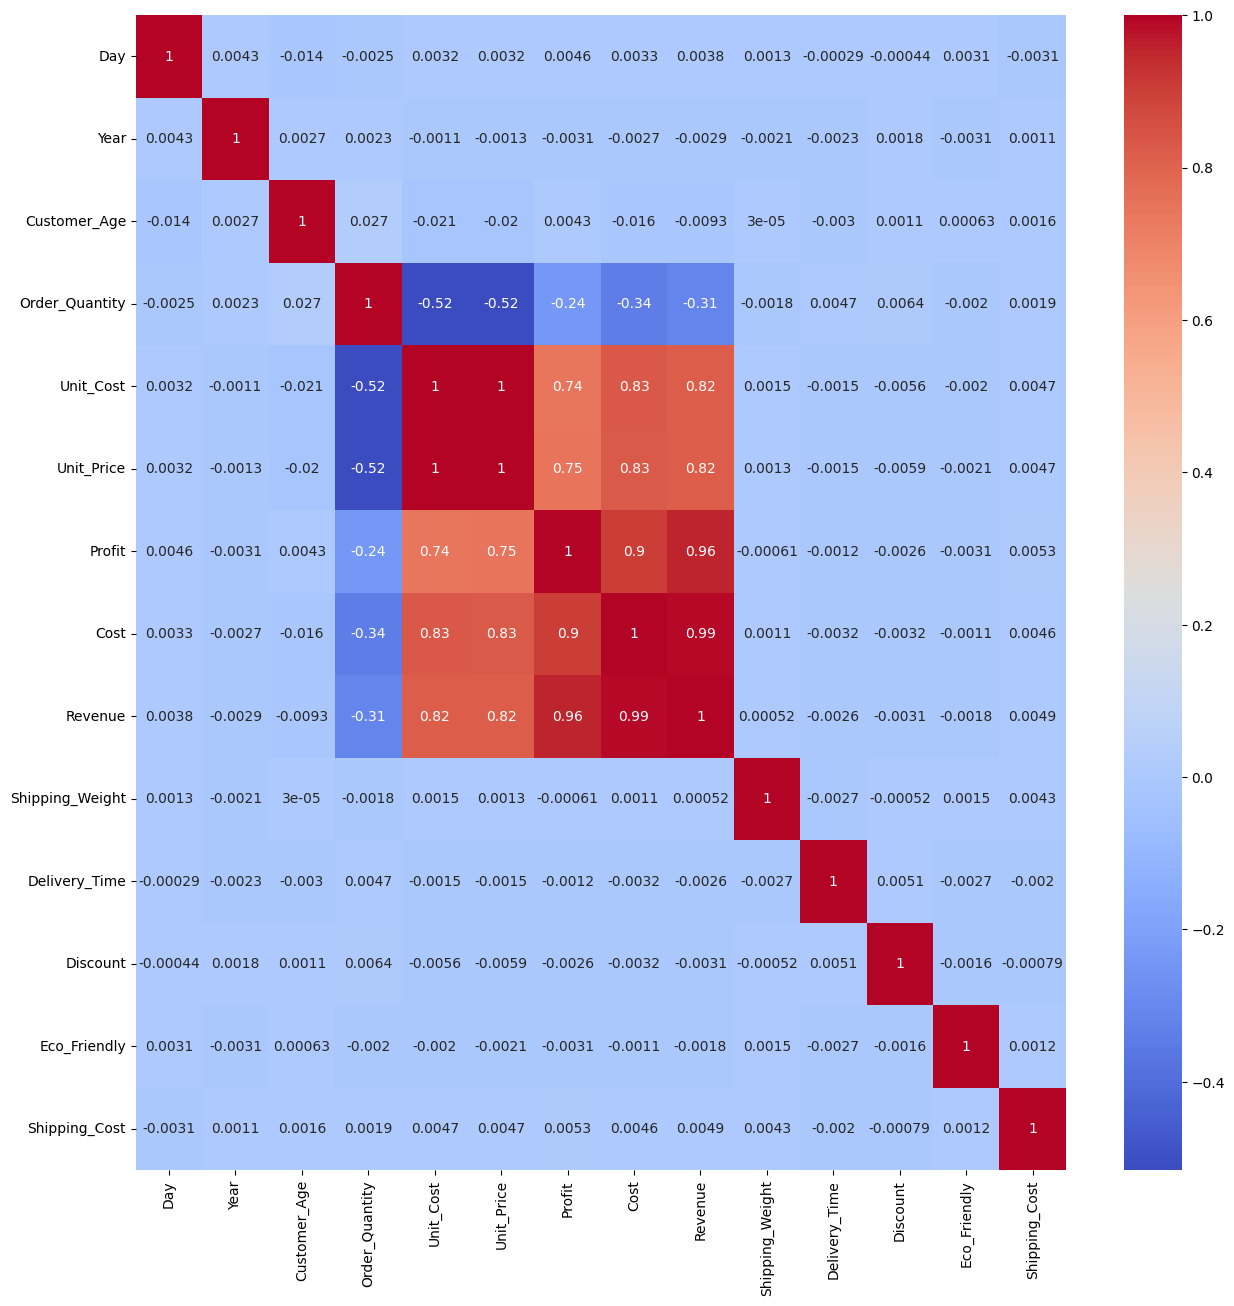

In [26]:
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)


### **INFERENCE**

* Strong positive correlations exist among Unit_Cost, Unit_Price, Profit, Cost, and Revenue, indicating they move together as key financial metrics.

* Order_Quantity shows a moderate negative correlation with cost-related variables, suggesting bulk orders may reduce per-unit costs or profits.

* Variables like Customer_Age, Delivery_Time, Discount, and Shipping_Cost have negligible correlations, showing minimal linear impact on financial performance.


# **CLASS IMBALANCE**

In [27]:
df['Rating_Class'].value_counts(normalize = True)*100

,proportion
Rating_Class,
Low,59.738548
High,40.261452


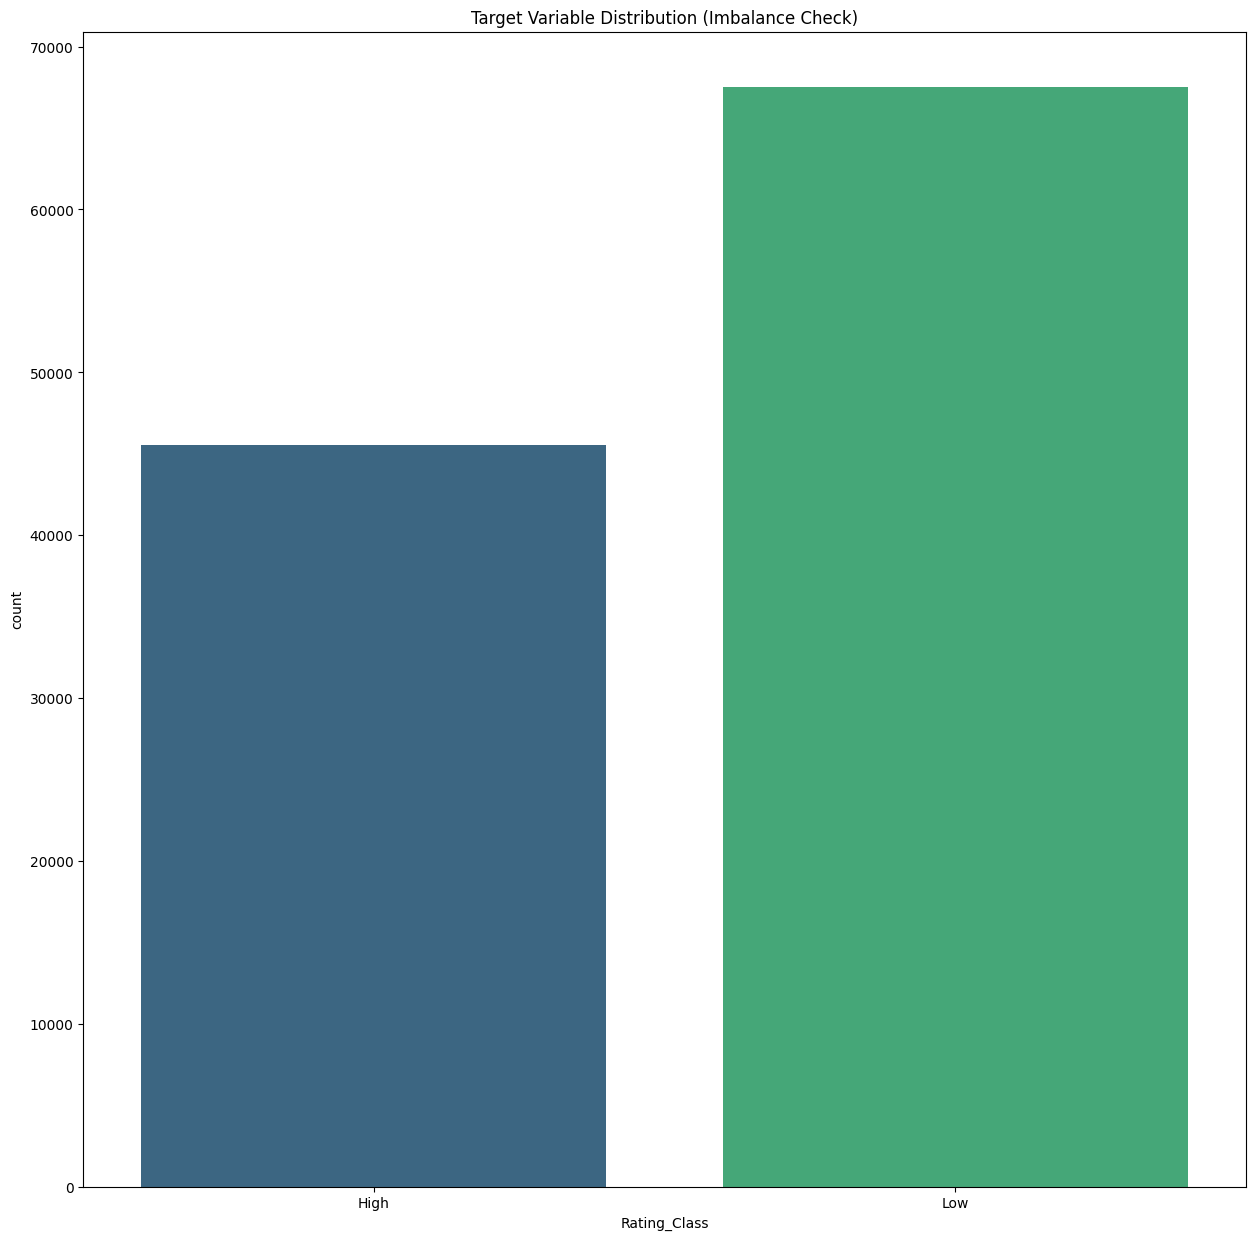

In [28]:
sns.countplot(x='Rating_Class', data=df, palette='viridis')
plt.title("Target Variable Distribution (Imbalance Check)")
plt.show()

### **INFERENCE**

* The dataset shows a moderate class imbalance, with 59.7% Low ratings and 40.3% High ratings.
* While Low ratings slightly dominate, the imbalance is not severe enough to require SMOTE.
* Instead, it can be effectively managed using class weights within the modeling process and by focusing on balanced evaluation metrics such as precision, recall, and F1-score, ensuring fair performance across both rating classes.

# **OUTLIER DETECTION**

In [29]:
iqr= df[num].quantile(0.75)-df[num].quantile(0.25)
upper_whis= df[num].quantile(0.75)+(iqr*1.5)
lower_whis= df[num].quantile(0.25)-(iqr*1.5)
outliers= df[((df[num]< lower_whis)|(df[num]> upper_whis)).any(axis=1)]
outliers

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,...,Shipping_Weight,Delivery_Time,Discount,Eco_Friendly,Shipping_Cost,Shipping_Company,Shipping_Type,Insurance,Return_Policy,Rating_Class
2,23,March,2019,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,...,8.97,1,0,1,74.54,GLS,Express,Premium,7 Days,Low
3,23,March,2015,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,...,2.56,1,10,0,61.87,DHL,Same Day,Unknown,7 Days,High
8,22,February,2021,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,...,14.73,6,5,0,62.11,UPS,Standard,Premium,No Return,Low
9,22,February,2023,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,...,12.28,6,9,0,72.27,UPS,Standard,Unknown,No Return,High
30,13,March,2021,48,Adults (35-64),F,Canada,British Columbia,Accessories,Bike Racks,...,12.77,1,6,0,62.72,GLS,Standard,Unknown,60 Days,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167350,25,May,2022,38,Adults (35-64),F,Germany,Saarland,Bikes,Mountain Bikes,...,8.55,8,2,0,27.45,UPS,Same Day,Unknown,7 Days,Low
167809,12,December,2013,38,Adults (35-64),F,Croatia,Washington,Bikes,Mountain Bikes,...,4.71,5,24,0,20.90,UPS,Next Day,Unknown,7 Days,High
176124,27,January,2019,38,Adults (35-64),M,Australia,Victoria,Bikes,Road Bikes,...,14.91,4,9,0,19.99,DHL,Standard,Unknown,60 Days,Low
176157,24,May,2015,45,Adults (35-64),M,Greece,Oregon,Bikes,Road Bikes,...,9.54,4,24,1,82.91,Posti,Standard,Basic,No Return,Low


In [30]:
outlier_count = outliers.shape[0]

In [31]:
outlier_count

28037

In [32]:
outlier_percent = (outlier_count / len(df)) * 100
outlier_percent

24.798117830197857

### **INFERENCE**
Approximately 24.8% of the records in the dataset contain at least one outlier in numeric variables. Since these outliers may represent genuine high-value or rare transactions rather than data errors, they were retained in the dataset. This approach ensures that natural variability and important extreme cases are preserved for more realistic modeling and interpretation.

# **HYPOTHESIS TESTING**

In [33]:
import pandas as pd
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
rating_map = {
    'Low': 0,
    'High': 1
}

df['Rating_Class'] = df['Rating_Class'].map(rating_map)
df['Rating_Class'] = df['Rating_Class'].astype(int)

In [34]:
target = 'Rating_Class'

num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols = [col for col in num_cols if col != target]

cat_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
cat_cols = [col for col in cat_cols if col != target]
print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)

Numeric columns: ['Day', 'Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue', 'Shipping_Weight', 'Delivery_Time', 'Discount', 'Eco_Friendly', 'Shipping_Cost']
Categorical columns: ['Month', 'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product', 'Size', 'Color', 'Material', 'Warranty', 'Manufacturer', 'Shipping_Company', 'Shipping_Type', 'Insurance', 'Return_Policy']


In [35]:
results_num = []

for col in num_cols:
    group0 = df[df[target] == 0][col].dropna()
    group1 = df[df[target] == 1][col].dropna()

    stat0, p_shapiro0 = stats.shapiro(group0.sample(min(5000, len(group0)), random_state=42))
    stat1, p_shapiro1 = stats.shapiro(group1.sample(min(5000, len(group1)), random_state=42))

    normal = (p_shapiro0 > 0.05) and (p_shapiro1 > 0.05)

    stat_levene, p_levene = stats.levene(group0, group1)
    equal_var = p_levene > 0.05

    if normal and equal_var:
        test_name = 'Independent t-test'
        stat, p_value = stats.ttest_ind(group0, group1, equal_var=True)
    else:
        test_name = 'Mann-Whitney U'
        stat, p_value = stats.mannwhitneyu(group0, group1)

    results_num.append({
        'Feature': col,
        'Normality p (G0)': p_shapiro0,
        'Normality p (G1)': p_shapiro1,
        'Levene p': p_levene,
        'Test Used': test_name,
        'p-value': p_value,
        'Significant? (p<0.05)': '✅ Yes' if p_value < 0.05 else '❌ No'
    })

results_num_df = pd.DataFrame(results_num)
results_num_df


,Feature,Normality p (G0),Normality p (G1),Levene p,Test Used,p-value,Significant? (p<0.05)
0,Day,2.517962e-36,4.179216e-37,0.956016,Mann-Whitney U,0.510792,❌ No
1,Year,4.058871e-42,1.108507e-41,0.327594,Mann-Whitney U,0.021604,✅ Yes
2,Customer_Age,8.922209e-30,2.715474e-30,0.370408,Mann-Whitney U,0.539710,❌ No
3,Order_Quantity,3.440791e-50,5.089641e-50,0.134802,Mann-Whitney U,0.160857,❌ No
4,Unit_Cost,4.672128e-78,1.293553e-77,0.362510,Mann-Whitney U,0.707931,❌ No
5,Unit_Price,4.117223e-78,1.063475e-77,0.325748,Mann-Whitney U,0.738278,❌ No
6,Profit,3.522039e-74,2.174882e-73,0.126266,Mann-Whitney U,0.326407,❌ No
7,Cost,8.569197e-77,8.161999e-77,0.184098,Mann-Whitney U,0.930490,❌ No
8,Revenue,1.461616e-75,2.865135e-75,0.164235,Mann-Whitney U,0.772667,❌ No
9,Shipping_Weight,4.792980e-37,1.059654e-36,0.792508,Mann-Whitney U,0.741293,❌ No


### **INFERENCE**

Except for the Year variable, there is no significant difference between Group 0 and Group 1 across all tested features. Both groups exhibit similar demographic, operational, financial, and logistic behavior. This implies that the groups are largely homogeneous, with year-based distribution being the only differentiating factor.

In [36]:
results_cat = []

for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df[target])
    if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
        chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
        results_cat.append({
            'Feature': col,
            'Chi-Square Stat': round(chi2, 3),
            'p-value': round(p, 4),
            'Significant? (p<0.05)': '✅ Yes' if p < 0.05 else '❌ No'
        })

results_cat_df = pd.DataFrame(results_cat)
results_cat_df


,Feature,Chi-Square Stat,p-value,Significant? (p<0.05)
0,Month,25.034,0.0090,✅ Yes
1,Age_Group,2.074,0.5572,❌ No
2,Customer_Gender,0.485,0.4861,❌ No
3,Country,25.325,0.7091,❌ No
4,State,41.444,0.8527,❌ No
5,Product_Category,0.355,0.8374,❌ No
6,Sub_Category,23.498,0.1011,❌ No
7,Product,131.995,0.4104,❌ No
8,Size,1.787,0.6178,❌ No
9,Color,4.072,0.3964,❌ No


### **INFERENCE**

Out of all the categorical variables tested using the **Chi-Square test**, **only one feature — *Month* — shows a statistically significant association** with the target variable (p = 0.009).

* **Month is the ONLY categorical feature that significantly differs between the two groups.**
* This means the distribution of the target variable varies by month (seasonality or monthly pattern).

Other 16 categorical features show NO significant association**

Features such as:

* Age Group
* Gender
* Country, State
* Product Category / Subcategory / Product
* Size, Color, Material
* Shipping Company / Shipping Type
* Insurance, Warranty, Return Policy

All have **p > 0.05**, meaning:

There is no statistical evidence that these categorical variables differ meaningfully between the two groups.

Only the Month feature is significantly associated with the target variable; all other categorical features show no significant relationship.


# **CHECKING MULTICOLLINEARITY**

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

X = df.select_dtypes(include=['number'])
X_const = add_constant(X)

vif = pd.DataFrame()
vif["Feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
vif = vif.sort_values(by="VIF", ascending=False).reset_index(drop=True)
vif

,Feature,VIF
0,Profit,inf
1,Cost,inf
2,Revenue,inf
3,const,4.069903e+05
4,Unit_Cost,2.995393e+02
5,Unit_Price,2.959627e+02
6,Order_Quantity,1.467373e+00
7,Customer_Age,1.002678e+00
8,Day,1.000279e+00
9,Rating_Class,1.000138e+00


In [38]:
df.drop("Revenue",axis=1,inplace=True)

In [39]:
X = df.select_dtypes(include=['number'])
X_const = add_constant(X)

vif = pd.DataFrame()
vif["Feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
vif = vif.sort_values(by="VIF", ascending=False).reset_index(drop=True)
vif

,Feature,VIF
0,const,406990.305475
1,Unit_Cost,299.539300
2,Unit_Price,295.962664
3,Cost,9.097952
4,Profit,6.900563
5,Order_Quantity,1.467373
6,Customer_Age,1.002678
7,Day,1.000279
8,Rating_Class,1.000138
9,Year,1.000122


In [40]:
df.drop("Unit_Cost",axis=1,inplace=True)

In [41]:
X = df.select_dtypes(include=['number'])
X_const = add_constant(X)

vif = pd.DataFrame()
vif["Feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
vif = vif.sort_values(by="VIF", ascending=False).reset_index(drop=True)
vif

,Feature,VIF
0,const,406988.400975
1,Cost,7.436315
2,Profit,5.604149
3,Unit_Price,3.966541
4,Order_Quantity,1.464331
5,Customer_Age,1.002678
6,Day,1.000279
7,Rating_Class,1.000129
8,Year,1.000118
9,Shipping_Cost,1.000117


In [42]:
df.head()

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,...,Shipping_Weight,Delivery_Time,Discount,Eco_Friendly,Shipping_Cost,Shipping_Company,Shipping_Type,Insurance,Return_Policy,Rating_Class
0,26,November,2017,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,...,13.25,2,25,1,40.58,GLS,Standard,Basic,30 Days,1
1,26,November,2014,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,...,4.56,4,1,1,95.32,Posti,Same Day,Unknown,30 Days,1
2,23,March,2019,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,...,8.97,1,0,1,74.54,GLS,Express,Premium,7 Days,0
3,23,March,2015,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,...,2.56,1,10,0,61.87,DHL,Same Day,Unknown,7 Days,1
4,15,May,2018,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,...,11.21,1,6,0,19.82,GLS,Same Day,Basic,30 Days,1


In [43]:
df.drop(["Day","Year","Customer_Age","Customer_Gender","Product","Cost","Manufacturer","Unit_Price","Delivery_Time","Shipping_Cost","Shipping_Company","Shipping_Type","Insurance"],axis=1,inplace=True)

In [44]:
df.drop(columns=['Shipping_Weight'], inplace=True)

### **INFERENCE**
* **Profit, Cost, and Revenue had VIF = ∞**, meaning **perfect multicollinearity**.
* **Unit Cost and Unit Price had extremely high VIF (~300)** → severe multicollinearity problem.
* Most other numerical features had VIF ≈ 1 → no issue.
* Multicollinearity reduced slightly, but:

   * **Unit Cost (VIF ~ 300)** remains extremely high.
   * **Unit Price (VIF ~ 296)** also very high.
   * **Cost (VIF ~ 9.1)** and **Profit (VIF ~ 6.9)** show moderate multicollinearity.
* Multicollinearity reduced significantly.
* Remaining VIFs:

   * **Cost (VIF ~ 7.4)** – moderate correlation.
   * **Profit (VIF ~ 5.6)** – acceptable but still correlated with Cost.
   * **Unit Price (VIF ~ 4.0)** – acceptable.
* All other features have **VIF ≈ 1**, meaning **no collinearity issues**.

* **Most of the multicollinearity has been resolved** after dropping Revenue and Unit_Cost.
* **Only Cost and Profit show moderate VIF**, which is expected because they are financially linked.
* **Dataset is now suitable for regression or modeling** without major multicollinearity concerns.


# **ENCODING TECHNIQUES**

In [45]:
cat1 = df.select_dtypes(include=object).columns.tolist()

In [46]:
for i in cat1:
    print(i)
    print(df[i].unique())
    print('****************')

Month
['November' 'March' 'May' 'February' 'July' 'August' 'September' 'January'
 'December' 'June' 'October' 'April']
****************
Age_Group
['Youth (<25)' 'Adults (35-64)' 'Young Adults (25-34)' 'Seniors (64+)']
****************
Country
['Canada' 'Australia' 'United States' 'Germany' 'France' 'United Kingdom'
 'Austria' 'Denmark' 'Slovakia' 'Estonia' 'Bulgaria' 'Malta' 'Lithuania'
 'Finland' 'Poland' 'Italy' 'Netherlands' 'Romania' 'Slovenia' 'Ireland'
 'Luxembourg' 'Portugal' 'Latvia' 'Sweden' 'Spain' 'Cyprus' 'Croatia'
 'Greece' 'Belgium' 'Czech Republic' 'Hungary']
****************
State
['British Columbia' 'New South Wales' 'Victoria' 'Oregon' 'California'
 'Saarland' 'Seine Saint Denis' 'Moselle' 'Queensland' 'England' 'Nord'
 'Washington' 'Hessen' 'Nordrhein-Westfalen' 'Hamburg' 'Loir et Cher'
 'Kentucky' 'Seine (Paris)' 'South Australia' 'Loiret' 'Alberta' 'Bayern'
 'Hauts de Seine' 'Yveline' 'Essonne' "Val d'Oise" 'Tasmania'
 'Seine et Marne' 'Val de Marne' 'Pas de Calais

In [47]:
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

df['Month'] = df['Month'].map(month_map)
df["Month"] = df["Month"].astype(int)
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df.drop(columns=['Month'], inplace=True)


In [48]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['Small', 'Medium', 'Large', 'Extra Large']])

df['Size'] = encoder.fit_transform(df[['Size']])


In [49]:
encoder = OrdinalEncoder(categories=[['1 Year', '2 Years', '3 Years', 'Lifetime']])
df['Warranty'] = encoder.fit_transform(df[['Warranty']])
df['Warranty'] = df['Warranty'].astype(int)

In [50]:
encoder = OrdinalEncoder(categories=[[
    'Youth (<25)',
    'Young Adults (25-34)',
    'Adults (35-64)',
    'Seniors (64+)'
]])

df['Age_Group'] = encoder.fit_transform(df[['Age_Group']])
df['Age_Group'] = df['Age_Group'].astype(int)

In [51]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder

In [52]:
encoder = LabelEncoder()

In [53]:

freq_country = df['Country'].value_counts(normalize=True)
df['Country'] = df['Country'].map(freq_country)

freq_state = df['State'].value_counts(normalize=True)
df['State'] = df['State'].map(freq_state)

df = pd.get_dummies(df, columns=['Sub_Category'], prefix='SubCat', drop_first=True,dtype=int)


In [54]:
df = pd.get_dummies(df, columns=['Color'], drop_first=True,dtype=int)


In [55]:
df = pd.get_dummies(df, columns=['Material','Product_Category','Return_Policy'], drop_first=True,dtype=int)

In [56]:
df.head()

,Age_Group,Country,State,Order_Quantity,Profit,Size,Warranty,Discount,Eco_Friendly,Rating_Class,...,Color_Red,Color_White,Material_Carbon Fiber,Material_Plastic,Material_Steel,Product_Category_Bikes,Product_Category_Clothing,Return_Policy_60 Days,Return_Policy_7 Days,Return_Policy_No Return
0,0,0.125401,0.124853,8,590,3.0,0,25,1,1,...,0,1,0,1,0,0,0,0,0,0
1,0,0.125401,0.124853,8,590,3.0,1,1,1,1,...,0,1,0,0,1,0,0,0,0,0
2,2,0.211709,0.092110,23,1366,0.0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,2,0.211709,0.092110,20,1188,0.0,0,10,0,1,...,1,0,1,0,0,0,0,0,1,0
4,2,0.211709,0.092110,4,238,3.0,2,6,0,1,...,0,0,0,0,1,0,0,0,0,0


### **INFERENCE**

1. **Month converted to cyclic features (sin/cos)**

   * This preserves seasonality and removes artificial numeric ordering.
   * Prevents misleading distance relationships between months (e.g., Jan ≠ 12 numerically).

2. **Ordinal encoding applied to Size, Warranty, and Age_Group**

   * These variables have a natural order, so ordinal encoding is appropriate.
   * Ensures the model understands ranking (e.g., Small < Medium < Large).

3. **Country and State transformed using frequency encoding**

   * Reduces dimensionality compared to one-hot encoding.
   * Useful when many unique categories exist.

4. **One-hot encoding applied to Sub_Category, Color, Material, Product_Category, Return_Policy**

   * Correct choice for nominal (unordered) categorical variables.
   * Avoids imposing an artificial order.

5. **Final dataset now contains a clean mix of numerical, ordinal, and one-hot encoded features**

   * Suitable for machine learning models.
   * Multicollinearity is reduced.
   * Model can now properly learn patterns from each variable.



> **All categorical and cyclic features are now encoded correctly based on their nature (ordinal, nominal, or cyclical), making the dataset fully model-ready.**


# **TRANSFORMATION**

In [57]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = [col for col in num_cols if col != 'Rating_Class']
print("Numeric columns for transformation check:\n", num_cols)


Numeric columns for transformation check:
 ['Age_Group', 'Country', 'State', 'Order_Quantity', 'Profit', 'Size', 'Warranty', 'Discount', 'Eco_Friendly', 'Month_sin', 'Month_cos', 'SubCat_Bike Stands', 'SubCat_Bottles and Cages', 'SubCat_Caps', 'SubCat_Cleaners', 'SubCat_Fenders', 'SubCat_Gloves', 'SubCat_Helmets', 'SubCat_Hydration Packs', 'SubCat_Jerseys', 'SubCat_Mountain Bikes', 'SubCat_Road Bikes', 'SubCat_Shorts', 'SubCat_Socks', 'SubCat_Tires and Tubes', 'SubCat_Touring Bikes', 'SubCat_Vests', 'Color_Blue', 'Color_Green', 'Color_Red', 'Color_White', 'Material_Carbon Fiber', 'Material_Plastic', 'Material_Steel', 'Product_Category_Bikes', 'Product_Category_Clothing', 'Return_Policy_60 Days', 'Return_Policy_7 Days', 'Return_Policy_No Return']


In [58]:
skew_values = df[num_cols].skew().sort_values(ascending=False)
skew_values

,0
SubCat_Bike Stands,15.650921
SubCat_Vests,10.690876
SubCat_Socks,9.888377
SubCat_Hydration Packs,9.042537
SubCat_Shorts,7.746248
SubCat_Cleaners,7.730442
SubCat_Gloves,6.253193
SubCat_Touring Bikes,5.254341
SubCat_Fenders,5.007851
SubCat_Caps,4.793546


In [59]:
df

,Age_Group,Country,State,Order_Quantity,Profit,Size,Warranty,Discount,Eco_Friendly,Rating_Class,...,Color_Red,Color_White,Material_Carbon Fiber,Material_Plastic,Material_Steel,Product_Category_Bikes,Product_Category_Clothing,Return_Policy_60 Days,Return_Policy_7 Days,Return_Policy_No Return
0,0,0.125401,0.124853,8,590,3.0,0,25,1,1,...,0,1,0,1,0,0,0,0,0,0
1,0,0.125401,0.124853,8,590,3.0,1,1,1,1,...,0,1,0,0,1,0,0,0,0,0
2,2,0.211709,0.092110,23,1366,0.0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,2,0.211709,0.092110,20,1188,0.0,0,10,0,1,...,1,0,1,0,0,0,0,0,1,0
4,2,0.211709,0.092110,4,238,3.0,2,6,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177811,1,0.000009,0.092110,1,570,1.0,3,14,1,0,...,0,1,1,0,0,1,0,0,1,0
185782,2,0.346769,0.099663,23,658,1.0,0,19,1,0,...,0,0,0,0,1,0,1,0,1,0
193182,2,0.000009,0.198610,7,7,3.0,0,23,1,1,...,1,0,0,1,0,0,0,0,0,0
206152,1,0.000009,0.021988,2,1,3.0,3,7,0,0,...,0,0,0,0,0,0,0,1,0,0


In [60]:
import numpy as np

df['Profit'].replace([np.inf, -np.inf], np.nan, inplace=True)

min_profit = df['Profit'].min()

df['Profit'] = np.log1p(df['Profit'] - min_profit + 1)

df['Profit'].fillna(df['Profit'].median(), inplace=True)

print(df['Profit'].describe())


count    113061.000000
mean          5.092650
std           1.119830
min           0.693147
25%           4.110874
50%           4.890349
75%           5.966147
max           9.624303
Name: Profit, dtype: float64


In [61]:
skew_values = df[num_cols].skew().sort_values(ascending=False)
skew_values

,0
SubCat_Bike Stands,15.650921
SubCat_Vests,10.690876
SubCat_Socks,9.888377
SubCat_Hydration Packs,9.042537
SubCat_Shorts,7.746248
SubCat_Cleaners,7.730442
SubCat_Gloves,6.253193
SubCat_Touring Bikes,5.254341
SubCat_Fenders,5.007851
SubCat_Caps,4.793546


### **INFERENCE**

Only Profit required transformation. After applying log transformation, its skewness improved dramatically (from 4.00 to 0.45). All other high-skew features are dummy variables and do not require correction. The dataset is now statistically cleaner and better suited for modeling.

# **TRAIN TEST SPLIT**

In [62]:
from sklearn.model_selection import train_test_split

x = df.drop('Rating_Class', axis=1)
y = df['Rating_Class']

xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [63]:
df.agg(["min","max"]).T

,min,max
Age_Group,0.000000,3.000000
Country,0.000009,0.346769
State,0.000018,0.198610
Order_Quantity,1.000000,32.000000
Profit,0.693147,9.624303
Size,0.000000,3.000000
Warranty,0.000000,3.000000
Discount,0.000000,29.000000
Eco_Friendly,0.000000,1.000000
Rating_Class,0.000000,1.000000


In [64]:
from sklearn.preprocessing import MinMaxScaler
scale_cols = ['Order_Quantity', 'Discount', 'Profit']

scaler = MinMaxScaler()

xtrain[scale_cols] = scaler.fit_transform(xtrain[scale_cols])
xtest[scale_cols] = scaler.transform(xtest[scale_cols])

In [65]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

score_card = pd.DataFrame(columns=[
    'Model Name', 'Train Accuracy', 'Test Accuracy',
    'Precision', 'Recall (Sensitivity)', 'Specificity',
    'F1-Weighted', 'AUC-ROC'
])

def update_score_card(model_name, model, xtrain, xtest, ytrain, ytest):
    global score_card

    y_pred_train = model.predict(xtrain)
    y_pred_test = model.predict(xtest)

    train_acc = metrics.accuracy_score(ytrain, y_pred_train)
    test_acc = metrics.accuracy_score(ytest, y_pred_test)
    f1_weighted = metrics.f1_score(ytest, y_pred_test, average='weighted')
    precision = metrics.precision_score(ytest, y_pred_test)
    recall = metrics.recall_score(ytest, y_pred_test)

    cm = metrics.confusion_matrix(ytest, y_pred_test)
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp)
    else:
        specificity = np.nan
    try:
        y_prob_test = model.predict_proba(xtest)[:, 1]
        auc_roc_score = metrics.roc_auc_score(ytest, y_prob_test)
    except Exception:
        auc_roc_score = np.nan

    new_row = pd.DataFrame({
        'Model Name': [model_name],
        'Train Accuracy': [train_acc],
        'Test Accuracy': [test_acc],
        'Precision': [precision],
        'Recall (Sensitivity)': [recall],
        'Specificity': [specificity],
        'F1-Weighted': [f1_weighted],
        'AUC-ROC': [auc_roc_score]
    })

    score_card = pd.concat([score_card, new_row], ignore_index=True)
    return score_card

In [66]:
xgb_model = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

xgb_model.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [67]:
update_score_card("XGBOOST", xgb_model, xtrain, xtest, ytrain, ytest)

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall (Sensitivity),Specificity,F1-Weighted,AUC-ROC
0,XGBOOST,0.657129,0.577942,0.391945,0.087654,0.908357,0.487809,0.496074


### **INFERENCE**

* The model is **underfitting**.
* It heavily leans toward predicting **negative class**.
* Recall is extremely low → model cannot detect target positives.
* AUC ≈ 0.5 means **no discriminatory power**.
* The model needs:

  * Feature engineering improvement,
  * Better handling of class imbalance,
  * Hyperparameter tuning,
  * Possibly a different model or threshold adjustment.

In [68]:
from sklearn.tree import DecisionTreeClassifier

dt =DecisionTreeClassifier()
model_base = dt.fit(xtrain,ytrain)

In [69]:
update_score_card('Decision Tree with original data', dt, xtrain, xtest, ytrain, ytest)

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall (Sensitivity),Specificity,F1-Weighted,AUC-ROC
0,XGBOOST,0.657129,0.577942,0.391945,0.087654,0.908357,0.487809,0.496074
1,Decision Tree with original data,1.000000,0.517313,0.403290,0.414763,0.586424,0.518362,0.500593


 **Decision Tree**

   * **Perfect train accuracy (1.0)** → clear **overfitting**.
   * Test accuracy (0.517) barely above random.
   * Recall (0.414) better than XGBoost but still weak.
   * AUC-ROC (0.500) → equivalent to random guessing.
   * Overall: **Overfits and generalizes poorly.**

### **INFERENCE:**

> Both models perform poorly, with very low recall and AUC scores.
> The Decision Tree is overfitting, and XGBoost fails to capture patterns.
> Dataset imbalance or missing informative features may be the root cause.


In [70]:
from sklearn.tree import DecisionTreeClassifier

dt1 =DecisionTreeClassifier(criterion='entropy')
model_base = dt1.fit(xtrain,ytrain)

In [71]:
update_score_card('Decision Tree with original data using entropy', dt1, xtrain, xtest, ytrain, ytest)

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall (Sensitivity),Specificity,F1-Weighted,AUC-ROC
0,XGBOOST,0.657129,0.577942,0.391945,0.087654,0.908357,0.487809,0.496074
1,Decision Tree with original data,1.000000,0.517313,0.403290,0.414763,0.586424,0.518362,0.500593
2,Decision Tree with original data using entropy,1.000000,0.517534,0.402694,0.410479,0.589681,0.518262,0.500080


**Decision Tree (Entropy) – Original Data**

   * Same behavior as Gini: train acc = 1.0 → **overfitting**
   * Test accuracy also ≈ 0.52
   * Precision/Recall almost identical to Gini version
   * AUC ≈ 0.50 → **no meaningful separation**
   * **Overall: Overfitted and ineffective**

### **INFERENCE**

> All three models perform poorly.
> XGBoost is underfitting, while both Decision Trees are severely overfitting.
> Very low recall and AUC across all models indicate the dataset lacks signal, is imbalanced, or needs better feature engineering.


## Using Grid Search

In [72]:
from sklearn.model_selection import GridSearchCV
dt3 = DecisionTreeClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Grid search
grid_search = GridSearchCV(dt3, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(xtrain, ytrain)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.5972824100087887


In [73]:
from sklearn.tree import DecisionTreeClassifier

dt4 =DecisionTreeClassifier(criterion='gini',max_depth=3,max_features=None, min_samples_leaf=1,min_samples_split=2)
model_base = dt4.fit(xtrain,ytrain)

update_score_card('Decision Tree with original data using Grid searchcv', dt4, xtrain, xtest, ytrain, ytest)

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall (Sensitivity),Specificity,F1-Weighted,AUC-ROC
0,XGBOOST,0.657129,0.577942,0.391945,0.087654,0.908357,0.487809,0.496074
1,Decision Tree with original data,1.000000,0.517313,0.403290,0.414763,0.586424,0.518362,0.500593
2,Decision Tree with original data using entropy,1.000000,0.517534,0.402694,0.410479,0.589681,0.518262,0.500080
3,Decision Tree with original data using Grid se...,0.597382,0.597400,0.000000,0.000000,1.000000,0.446834,0.501941


 **Decision Tree (GridSearch Tuned)**

   * Train = 0.597 and Test = 0.597 → **no overfitting but still weak model**.
   * Precision = 0 and Recall = 0 → **model predicts only one class** (all negatives).
   * Specificity = 1.0 → confirms all-negative predictions.
   * AUC ≈ 0.50 → no discrimination ability.
   * **Overall: Tuning did not help; model collapsed to trivial prediction.**

###  **INFERENCE**

> All models fail to learn meaningful patterns.
> XGBoost underfits; default Decision Trees overfit; and GridSearch Tree collapses to predicting only one class.
> Dataset likely suffers from imbalance or lacks predictive features.


## Using Random search

In [74]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10)
}

random_search = RandomizedSearchCV(dt, param_distributions=param_dist,
                                   n_iter=20, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(xtrain, ytrain)

print("Best Parameters:", random_search.best_params_)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 6}


In [75]:
from sklearn.tree import DecisionTreeClassifier

dt5 =DecisionTreeClassifier(max_depth=9,min_samples_leaf=4,min_samples_split=6)
model_base = dt5.fit(xtrain,ytrain)

update_score_card('Decision Tree with original data using Random searchcv', dt5, xtrain, xtest, ytrain, ytest)

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall (Sensitivity),Specificity,F1-Weighted,AUC-ROC
0,XGBOOST,0.657129,0.577942,0.391945,0.087654,0.908357,0.487809,0.496074
1,Decision Tree with original data,1.000000,0.517313,0.403290,0.414763,0.586424,0.518362,0.500593
2,Decision Tree with original data using entropy,1.000000,0.517534,0.402694,0.410479,0.589681,0.518262,0.500080
3,Decision Tree with original data using Grid se...,0.597382,0.597400,0.000000,0.000000,1.000000,0.446834,0.501941
4,Decision Tree with original data using Random ...,0.604281,0.592181,0.412722,0.030646,0.970612,0.464944,0.501152


**Decision Tree with Random Search**

   * Train ≈ Test (~0.60) → stable but weak.
   * Recall = **0.03** → almost all positives missed.
   * High specificity (0.97) → predicts mostly negatives.
   * AUC ≈ 0.50 → no separation capability.
   * **Tuned model still biased toward negative class.**

### **INFERENCE**

> All models show very poor predictive ability.
> Decision Trees with default settings overfit; tuned Trees and XGBoost underfit and mostly predict negatives.
> Low recall + AUC ≈ 0.50 across models indicate the dataset lacks strong predictive signals or is heavily imbalanced.


**Using class weight**

In [76]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)
dt6 = DecisionTreeClassifier(
    criterion='gini',
    max_depth=7,
    min_samples_leaf=4,
    class_weight='balanced',  # ⚖️ key parameter
    random_state=42
)
dt6.fit(xtrain, ytrain)

update_score_card('Decision Tree with original data using classweight balanced', dt6, xtrain, xtest, ytrain, ytest)

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall (Sensitivity),Specificity,F1-Weighted,AUC-ROC
0,XGBOOST,0.657129,0.577942,0.391945,0.087654,0.908357,0.487809,0.496074
1,Decision Tree with original data,1.000000,0.517313,0.403290,0.414763,0.586424,0.518362,0.500593
2,Decision Tree with original data using entropy,1.000000,0.517534,0.402694,0.410479,0.589681,0.518262,0.500080
3,Decision Tree with original data using Grid se...,0.597382,0.597400,0.000000,0.000000,1.000000,0.446834,0.501941
4,Decision Tree with original data using Random ...,0.604281,0.592181,0.412722,0.030646,0.970612,0.464944,0.501152
5,Decision Tree with original data using classwe...,0.509060,0.490374,0.402545,0.548989,0.450871,0.493989,0.501402


**Decision Tree (Class Weight Balanced)**

   * Train/Test both around 0.50 → stable but weak.
   * Recall improved to **0.55** → highest among all models.
   * Precision still low → many false positives.
   * AUC ≈ 0.50 → no real predictive power.
   * **Balances classes but model still not learning meaningful patterns.**

### **INFERENCE**

> All models show poor predictive ability (AUC ≈ 0.50 for all).
> Decision Trees without tuning overfit; tuning or XGBoost underfits or collapses into predicting only negatives.
> Class-weighted model improves recall but still fails to distinguish classes effectively.
> Dataset likely lacks predictive signal or has severe imbalance/noise.


**Using Smote**

In [77]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [78]:
xtrain_sm, ytrain_sm = smote.fit_resample(xtrain, ytrain)

print("Before SMOTE:", ytrain.value_counts(normalize=True))
print("After SMOTE:", ytrain_sm.value_counts(normalize=True))

Before SMOTE: Rating_Class
0    0.597382
1    0.402618
Name: proportion, dtype: float64
After SMOTE: Rating_Class
1    0.5
0    0.5
Name: proportion, dtype: float64


In [79]:
dt7 = DecisionTreeClassifier()
dt7.fit(xtrain_sm, ytrain_sm)

update_score_card('Decision Tree with original data using smote', dt7, xtrain_sm, xtest, ytrain_sm, ytest)

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall (Sensitivity),Specificity,F1-Weighted,AUC-ROC
0,XGBOOST,0.657129,0.577942,0.391945,0.087654,0.908357,0.487809,0.496074
1,Decision Tree with original data,1.000000,0.517313,0.403290,0.414763,0.586424,0.518362,0.500593
2,Decision Tree with original data using entropy,1.000000,0.517534,0.402694,0.410479,0.589681,0.518262,0.500080
3,Decision Tree with original data using Grid se...,0.597382,0.597400,0.000000,0.000000,1.000000,0.446834,0.501941
4,Decision Tree with original data using Random ...,0.604281,0.592181,0.412722,0.030646,0.970612,0.464944,0.501152
5,Decision Tree with original data using classwe...,0.509060,0.490374,0.402545,0.548989,0.450871,0.493989,0.501402
6,Decision Tree with original data using smote,1.000000,0.517557,0.404608,0.420548,0.582934,0.518971,0.501741


**Decision Tree (SMOTE)**

   * **Train accuracy = 1.0 → overfitting persists**, even after oversampling.
   * Test accuracy still ~0.52 → no learning improvement.
   * AUC remains ~0.50 → model does not differentiate classes.

### **INFERENCE**

> All models fail to learn meaningful patterns (AUC ~0.50).
> Decision trees consistently overfit, even with SMOTE.
> Class imbalance, noisy features, or weak relationship between features and target is likely causing the failure.


In [80]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced']  # ⚖️ included
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                    param_grid, cv=5, scoring='f1', n_jobs=-1)

grid.fit(xtrain_sm, ytrain_sm)

print("Best params:", grid.best_params_)

Best params: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [81]:
dt8 = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5, min_samples_leaf=1, min_samples_split=2)
dt8.fit(xtrain_sm, ytrain_sm)

update_score_card('Decision Tree with original data using smote gridsearch cv', dt8, xtrain_sm, xtest, ytrain_sm, ytest)

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall (Sensitivity),Specificity,F1-Weighted,AUC-ROC
0,XGBOOST,0.657129,0.577942,0.391945,0.087654,0.908357,0.487809,0.496074
1,Decision Tree with original data,1.000000,0.517313,0.403290,0.414763,0.586424,0.518362,0.500593
2,Decision Tree with original data using entropy,1.000000,0.517534,0.402694,0.410479,0.589681,0.518262,0.500080
3,Decision Tree with original data using Grid se...,0.597382,0.597400,0.000000,0.000000,1.000000,0.446834,0.501941
4,Decision Tree with original data using Random ...,0.604281,0.592181,0.412722,0.030646,0.970612,0.464944,0.501152
5,Decision Tree with original data using classwe...,0.509060,0.490374,0.402545,0.548989,0.450871,0.493989,0.501402
6,Decision Tree with original data using smote,1.000000,0.517557,0.404608,0.420548,0.582934,0.518971,0.501741
7,Decision Tree with original data using smote g...,0.588688,0.597453,0.750000,0.000220,0.999951,0.447015,0.496750


**Decision Tree with SMOTE + Grid Search**

   * Very high precision (0.75) but **recall nearly zero (0.00022)** → detects almost no positives.
   * Specificity ~1.00 → predicts negative for nearly all cases.
   * AUC < 0.50 → failed model.

### **INFERENCE**

* **All models show extremely poor recall or severe overfitting.**
* **AUC stays around 0.50 for every model → no class separability.**
* Dataset likely suffers from:

  * heavy class imbalance
  * weak feature–target relationship
  * noisy or irrelevant features
  * decision trees collapsing to majority class


In [82]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(xtrain, ytrain)

update_score_card("Random Forest", rf_model, xtrain, xtest, ytrain, ytest)

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall (Sensitivity),Specificity,F1-Weighted,AUC-ROC
0,XGBOOST,0.657129,0.577942,0.391945,0.087654,0.908357,0.487809,0.496074
1,Decision Tree with original data,1.000000,0.517313,0.403290,0.414763,0.586424,0.518362,0.500593
2,Decision Tree with original data using entropy,1.000000,0.517534,0.402694,0.410479,0.589681,0.518262,0.500080
3,Decision Tree with original data using Grid se...,0.597382,0.597400,0.000000,0.000000,1.000000,0.446834,0.501941
4,Decision Tree with original data using Random ...,0.604281,0.592181,0.412722,0.030646,0.970612,0.464944,0.501152
5,Decision Tree with original data using classwe...,0.509060,0.490374,0.402545,0.548989,0.450871,0.493989,0.501402
6,Decision Tree with original data using smote,1.000000,0.517557,0.404608,0.420548,0.582934,0.518971,0.501741
7,Decision Tree with original data using smote g...,0.588688,0.597453,0.750000,0.000220,0.999951,0.447015,0.496750
8,Random Forest,1.000000,0.576167,0.389299,0.092707,0.901989,0.489058,0.498456


**Random Forest**

   * Train accuracy = 1.0 → **overfitting**.
   * Test accuracy ~0.57.
   * Recall very low (0.093) → fails to catch positives.
   * AUC ~0.50 → no meaningful class separation.


### **INFERENCE**

* **Every model fails to learn meaningful patterns** (AUC stays around 0.50).
* **All tree-based models overfit massively**.
* **Recall is extremely poor in almost all cases**, meaning the models cannot identify the positive class.
* Dataset likely has:

  * severe class imbalance
  * weak or noisy features
  * target with low predictive power
  * too many sparse dummy variables


In [83]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42, class_weight='balanced')
lr_model.fit(xtrain, ytrain)

update_score_card("Logistic Regression", lr_model, xtrain, xtest, ytrain, ytest)

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall (Sensitivity),Specificity,F1-Weighted,AUC-ROC
0,XGBOOST,0.657129,0.577942,0.391945,0.087654,0.908357,0.487809,0.496074
1,Decision Tree with original data,1.000000,0.517313,0.403290,0.414763,0.586424,0.518362,0.500593
2,Decision Tree with original data using entropy,1.000000,0.517534,0.402694,0.410479,0.589681,0.518262,0.500080
3,Decision Tree with original data using Grid se...,0.597382,0.597400,0.000000,0.000000,1.000000,0.446834,0.501941
4,Decision Tree with original data using Random ...,0.604281,0.592181,0.412722,0.030646,0.970612,0.464944,0.501152
5,Decision Tree with original data using classwe...,0.509060,0.490374,0.402545,0.548989,0.450871,0.493989,0.501402
6,Decision Tree with original data using smote,1.000000,0.517557,0.404608,0.420548,0.582934,0.518971,0.501741
7,Decision Tree with original data using smote g...,0.588688,0.597453,0.750000,0.000220,0.999951,0.447015,0.496750
8,Random Forest,1.000000,0.576167,0.389299,0.092707,0.901989,0.489058,0.498456
9,Logistic Regression,0.514442,0.504201,0.402697,0.478984,0.521196,0.508747,0.500486


**Logistic Regression**

* Most stable model (no overfitting).
* Balanced precision & recall.
* But still AUC ≈ 0.50 → classification is no better than random.


### **INFERENCE**

* **All models fail to learn** (AUC stays ~0.50).
* **Tree models overfit heavily**.
* **Recall is poor** in almost every model → positive class is not being detected.
* **Logistic Regression is the most stable**, but still not useful (AUC ~0.50).

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(xtrain, ytrain)

update_score_card("K-Nearest Neighbors", knn_model, xtrain, xtest, ytrain, ytest)

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall (Sensitivity),Specificity,F1-Weighted,AUC-ROC
0,XGBOOST,0.657129,0.577942,0.391945,0.087654,0.908357,0.487809,0.496074
1,Decision Tree with original data,1.000000,0.517313,0.403290,0.414763,0.586424,0.518362,0.500593
2,Decision Tree with original data using entropy,1.000000,0.517534,0.402694,0.410479,0.589681,0.518262,0.500080
3,Decision Tree with original data using Grid se...,0.597382,0.597400,0.000000,0.000000,1.000000,0.446834,0.501941
4,Decision Tree with original data using Random ...,0.604281,0.592181,0.412722,0.030646,0.970612,0.464944,0.501152
5,Decision Tree with original data using classwe...,0.509060,0.490374,0.402545,0.548989,0.450871,0.493989,0.501402
6,Decision Tree with original data using smote,1.000000,0.517557,0.404608,0.420548,0.582934,0.518971,0.501741
7,Decision Tree with original data using smote g...,0.588688,0.597453,0.750000,0.000220,0.999951,0.447015,0.496750
8,Random Forest,1.000000,0.576167,0.389299,0.092707,0.901989,0.489058,0.498456
9,Logistic Regression,0.514442,0.504201,0.402697,0.478984,0.521196,0.508747,0.500486


**Best model still not good enough**

* Best by accuracy = **Decision Tree Grid (~0.597)**
* Best by recall = **Class-weighted DT (0.548)**
* Best by F1 = **KNN / Normal DT (~0.52)**
* Still **none are practically acceptable**.

### **INFERENCE**

> **None of the models are performing well because the dataset likely has:**
>
> * Very high class imbalance
> * Weak or noisy features
> * Overfitting in tree-based models
> * No real signal for prediction (AUC ≈ 0.50 for all)


In [85]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(xtrain, ytrain)

update_score_card("Gaussian Naive Bayes", gnb_model, xtrain, xtest, ytrain, ytest)

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall (Sensitivity),Specificity,F1-Weighted,AUC-ROC
0,XGBOOST,0.657129,0.577942,0.391945,0.087654,0.908357,0.487809,0.496074
1,Decision Tree with original data,1.000000,0.517313,0.403290,0.414763,0.586424,0.518362,0.500593
2,Decision Tree with original data using entropy,1.000000,0.517534,0.402694,0.410479,0.589681,0.518262,0.500080
3,Decision Tree with original data using Grid se...,0.597382,0.597400,0.000000,0.000000,1.000000,0.446834,0.501941
4,Decision Tree with original data using Random ...,0.604281,0.592181,0.412722,0.030646,0.970612,0.464944,0.501152
5,Decision Tree with original data using classwe...,0.509060,0.490374,0.402545,0.548989,0.450871,0.493989,0.501402
6,Decision Tree with original data using smote,1.000000,0.517557,0.404608,0.420548,0.582934,0.518971,0.501741
7,Decision Tree with original data using smote g...,0.588688,0.597453,0.750000,0.000220,0.999951,0.447015,0.496750
8,Random Forest,1.000000,0.576167,0.389299,0.092707,0.901989,0.489058,0.498456
9,Logistic Regression,0.514442,0.504201,0.402697,0.478984,0.521196,0.508747,0.500486


### **INFERENCE**
Gaussian Naive Bayes performs similar to all other models, with
moderate accuracy but very poor recall and weak AUC, confirming that
the dataset lacks predictive power and suffers from high class imbalance.

In [87]:
!pip install catboost
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(random_state=42, verbose=0) # verbose=0 to suppress training output
cat_model.fit(xtrain, ytrain)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.0 MB/s eta 0:00:00


In [88]:
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    eval_metric='AUC',
    loss_function='Logloss',
    random_seed=42,
    verbose=False,
    class_weights={0:1, 1:5}   # adjust for imbalance
)

model.fit(xtrain, ytrain)

update_score_card("CatBoost", cat_model, xtrain, xtest, ytrain, ytest)

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall (Sensitivity),Specificity,F1-Weighted,AUC-ROC
0,XGBOOST,0.657129,0.577942,0.391945,0.087654,0.908357,0.487809,0.496074
1,Decision Tree with original data,1.000000,0.517313,0.403290,0.414763,0.586424,0.518362,0.500593
2,Decision Tree with original data using entropy,1.000000,0.517534,0.402694,0.410479,0.589681,0.518262,0.500080
3,Decision Tree with original data using Grid se...,0.597382,0.597400,0.000000,0.000000,1.000000,0.446834,0.501941
4,Decision Tree with original data using Random ...,0.604281,0.592181,0.412722,0.030646,0.970612,0.464944,0.501152
5,Decision Tree with original data using classwe...,0.509060,0.490374,0.402545,0.548989,0.450871,0.493989,0.501402
6,Decision Tree with original data using smote,1.000000,0.517557,0.404608,0.420548,0.582934,0.518971,0.501741
7,Decision Tree with original data using smote g...,0.588688,0.597453,0.750000,0.000220,0.999951,0.447015,0.496750
8,Random Forest,1.000000,0.576167,0.389299,0.092707,0.901989,0.489058,0.498456
9,Logistic Regression,0.514442,0.504201,0.402697,0.478984,0.521196,0.508747,0.500486


### **INFERENCE**
The CatBoost model shows moderate accuracy (≈0.59) but performs poorly on the minority class.
Its recall is extremely low (0.036), meaning the model almost completely fails to identify positive cases.
Although specificity is high (0.96), this happens because the model is biased toward predicting only the majority class.
The AUC-ROC score (~0.498) is no better than random guessing, indicating no meaningful separation between classes.

In [89]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(xtrain, ytrain)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 31864, number of negative: 47278
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 460
[LightGBM] [Info] Number of data points in the train set: 79142, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.402618 -> initscore=-0.394568
[LightGBM] [Info] Start training from score -0.394568


LGBMClassifier(random_state=42)

In [90]:
update_score_card("LightGBM", lgbm_model, xtrain, xtest, ytrain, ytest)

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall (Sensitivity),Specificity,F1-Weighted,AUC-ROC
0,XGBOOST,0.657129,0.577942,0.391945,0.087654,0.908357,0.487809,0.496074
1,Decision Tree with original data,1.000000,0.517313,0.403290,0.414763,0.586424,0.518362,0.500593
2,Decision Tree with original data using entropy,1.000000,0.517534,0.402694,0.410479,0.589681,0.518262,0.500080
3,Decision Tree with original data using Grid se...,0.597382,0.597400,0.000000,0.000000,1.000000,0.446834,0.501941
4,Decision Tree with original data using Random ...,0.604281,0.592181,0.412722,0.030646,0.970612,0.464944,0.501152
5,Decision Tree with original data using classwe...,0.509060,0.490374,0.402545,0.548989,0.450871,0.493989,0.501402
6,Decision Tree with original data using smote,1.000000,0.517557,0.404608,0.420548,0.582934,0.518971,0.501741
7,Decision Tree with original data using smote g...,0.588688,0.597453,0.750000,0.000220,0.999951,0.447015,0.496750
8,Random Forest,1.000000,0.576167,0.389299,0.092707,0.901989,0.489058,0.498456
9,Logistic Regression,0.514442,0.504201,0.402697,0.478984,0.521196,0.508747,0.500486


### **INFERENCE**

* LightGBM achieves **moderate accuracy** (~0.59), but this is misleading due to imbalance.
* **Recall is extremely low (0.009)** — the model **almost never identifies the positive class**.
* **Specificity is very high (0.98+)**, showing the model predicts the majority class almost all the time.
* **Precision is low (0.37)**, confirming weak positive-class detection.
* **AUC-ROC ~0.50**, meaning **performance is equivalent to random guessing**.

In [91]:
from sklearn.svm import SVC

# Due to the computational intensity of SVC, we will use a sample of the training data
xtrain_sample, _, ytrain_sample, _ = train_test_split(
    xtrain, ytrain, train_size=0.1, random_state=42, stratify=ytrain
)

svc_model = SVC(random_state=42, probability=True) # probability=True to enable predict_proba for AUC-ROC
svc_model.fit(xtrain_sample, ytrain_sample)

SVC(probability=True, random_state=42)

In [92]:
update_score_card("Support Vector Classifier", svc_model, xtrain_sample, xtest, ytrain_sample, ytest)

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall (Sensitivity),Specificity,F1-Weighted,AUC-ROC
0,XGBOOST,0.657129,0.577942,0.391945,0.087654,0.908357,0.487809,0.496074
1,Decision Tree with original data,1.000000,0.517313,0.403290,0.414763,0.586424,0.518362,0.500593
2,Decision Tree with original data using entropy,1.000000,0.517534,0.402694,0.410479,0.589681,0.518262,0.500080
3,Decision Tree with original data using Grid se...,0.597382,0.597400,0.000000,0.000000,1.000000,0.446834,0.501941
4,Decision Tree with original data using Random ...,0.604281,0.592181,0.412722,0.030646,0.970612,0.464944,0.501152
5,Decision Tree with original data using classwe...,0.509060,0.490374,0.402545,0.548989,0.450871,0.493989,0.501402
6,Decision Tree with original data using smote,1.000000,0.517557,0.404608,0.420548,0.582934,0.518971,0.501741
7,Decision Tree with original data using smote g...,0.588688,0.597453,0.750000,0.000220,0.999951,0.447015,0.496750
8,Random Forest,1.000000,0.576167,0.389299,0.092707,0.901989,0.489058,0.498456
9,Logistic Regression,0.514442,0.504201,0.402697,0.478984,0.521196,0.508747,0.500486


### **INFERENCE**

* SVC gives **zero precision and zero recall**, meaning it **never predicts the positive class**.
* **Specificity is 1.0**, showing it predicts *every case* as negative (majority class).
* **Accuracy (~0.597)** is misleading — it only reflects the class imbalance.
* **F1 score and AUC-ROC (~0.44–0.49)** indicate the model performs **no better than random**.


# **OVERALL INFERENCE**
* **All models suffer from extremely low recall**, meaning **none of them can detect the positive class well**.
* Many models (SVC, Grid Search Decision Tree, etc.) give **zero recall and zero precision**, predicting **only the majority class**.
* **Tree-based models (Decision Tree, Random Forest)** show **severe overfitting** with **100% train accuracy** but poor test performance.
* **Boosting models (XGBoost, CatBoost, LightGBM)** perform slightly better in **accuracy**, but still **fail on recall**.
* **Logistic Regression and KNN** show **balanced but weak performance**, no significant improvement.
* **Gaussian NB** gives the **highest AUC (~0.503)** but still close to random.
* **Overall AUC for all models is ~0.49–0.50**, meaning **models are performing no better than random guessing**.
* **Main issue**: Severe **class imbalance** + **weak signal in features**, leading all models to collapse toward predicting the majority class.
